In [1]:
#Se importan las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pingouin as pg
import statsmodels.stats.multicomp as smm


In [2]:
#Se lee el archivo csv y se ven los primeros 5 valores y despues se observa el tipo de datos que son
Datos = pd.read_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Aprendizaje automatico/Tareas/Tarea 1/typed_uanl.csv')
print(Datos.head())
print('-----------------------------------------------------')
print(Datos.info())
print('-----------------------------------------------------')
print(Datos.describe())

                                Nombre  Sueldo Neto        dependencia  \
0         BRENDA AZENETH PICAZO GARCIA      8620.34  JUNTA DE GOBIERNO   
1    MARIA BEATRIZ VILLAGOMEZ GONZALEZ      7401.35  JUNTA DE GOBIERNO   
2        MARTHA ALICIA SILVA HERNANDEZ      5326.98  JUNTA DE GOBIERNO   
3              ALBERTINA DAVILA PUENTE      9483.10           RECTORIA   
4  AMELIA GRACIELA MARTINEZ DE LA PENA      9278.10           RECTORIA   

        Fecha   Tipo  
0  2019-12-01  ADMIN  
1  2019-12-01  ADMIN  
2  2019-12-01  ADMIN  
3  2019-12-01  ADMIN  
4  2019-12-01  ADMIN  
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636201 entries, 0 to 636200
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Nombre       636201 non-null  object 
 1   Sueldo Neto  636201 non-null  float64
 2   dependencia  636201 non-null  object 
 3   Fecha        636201 non-null  obj

In [3]:
#De los datos anteriores puedo identificar como entidades a las columnas que son: Nombre, Sueldo neto, dependencia, fecha y tipo.
#Creo que como objeto de estudio me interesa mas enfocarme en lo que es el sueldo neto y las dependencias asi como sus tipos.
#Se transforman la fecha al tipo de dato de fecha.
Datos["Fecha"] = pd.to_datetime(Datos["Fecha"])

In [4]:
#Se vuelve a ejecutar la descripcion de los datos para obtener las medidas descriptivas de las fechas
print(Datos.describe())

         Sueldo Neto                          Fecha
count  636201.000000                         636201
mean    14241.682401  2021-12-01 04:03:39.394813952
min       175.410000            2019-12-01 00:00:00
25%      8007.660000            2020-11-01 00:00:00
50%     11426.500000            2021-11-01 00:00:00
75%     17654.630000            2023-01-01 00:00:00
max    147051.590000            2024-01-01 00:00:00
std      9578.442311                            NaN


In [5]:
#Se imprimen lso datos unicos de la columna Tipo
Datos["Tipo"].unique()

array(['ADMIN', 'CENTRO', 'PREPARATORIA', 'FACULTAD', 'HOSPITAL', 'OTRO'],
      dtype=object)

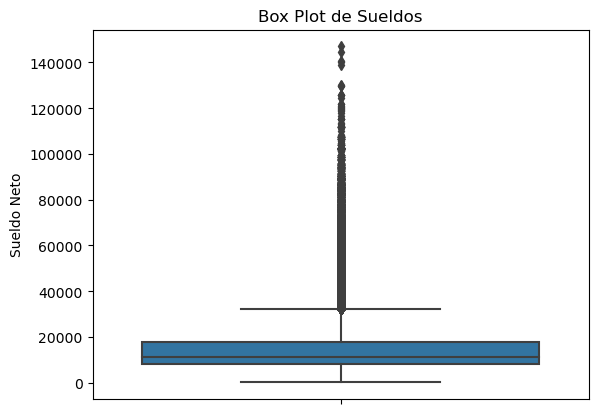

In [6]:
#Se crea un boxplot de los salarios
sns.boxplot(y = Datos["Sueldo Neto"])
plt.title("Box Plot de Sueldos") 
plt.show()

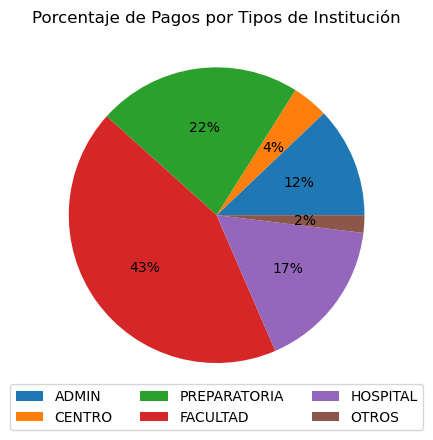

In [7]:
#Se crea gráfica de pastel para observar el de sueldos por tipo
plt.pie([Datos['Tipo'].value_counts()["ADMIN"], Datos['Tipo'].value_counts()["CENTRO"], Datos['Tipo'].value_counts()["PREPARATORIA"], Datos['Tipo'].value_counts()["FACULTAD"], Datos['Tipo'].value_counts()["HOSPITAL"], Datos['Tipo'].value_counts()["OTRO"]], autopct='%.0f%%')
plt.legend(["ADMIN", "CENTRO", "PREPARATORIA", "FACULTAD", "HOSPITAL", "OTROS"], loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.title("Porcentaje de Pagos por Tipos de Institución")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

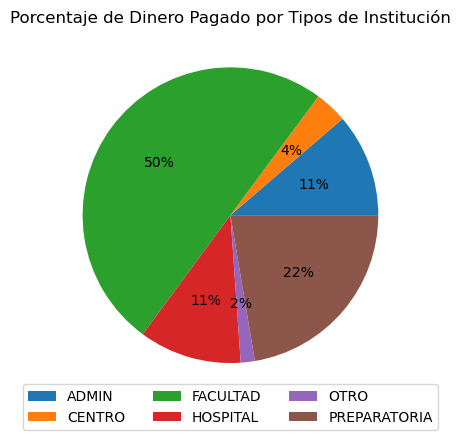

In [8]:
#Porcentaje de sueldos por tipo de institución
Sueldos_Tipo = Datos.groupby('Tipo', as_index=False).sum("Sueldo Neto")
plt.pie([Sueldos_Tipo['Sueldo Neto'].iloc[0], Sueldos_Tipo['Sueldo Neto'].iloc[1], Sueldos_Tipo['Sueldo Neto'].iloc[2], Sueldos_Tipo['Sueldo Neto'].iloc[3], Sueldos_Tipo['Sueldo Neto'].iloc[4], Sueldos_Tipo['Sueldo Neto'].iloc[5]], autopct='%.0f%%')
plt.legend(list(Sueldos_Tipo['Tipo']), loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.title("Porcentaje de Dinero Pagado por Tipos de Institución")
plt.show

In [9]:
#De la agrupacion anterior se obtienen las estadisticas descriptivas:
print(Sueldos_Tipo.describe())

        Sueldo Neto
count  6.000000e+00
mean   1.510095e+09
std    1.623700e+09
min    1.391335e+08
25%    4.950036e+08
50%    1.020463e+09
75%    1.775136e+09
max    4.533969e+09


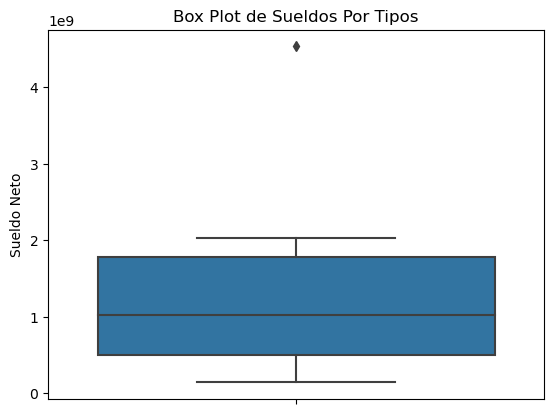

In [10]:
#Se hace un Boxplot de los sueldos de los tipos de instituciones:
sns.boxplot(y = Sueldos_Tipo["Sueldo Neto"])
plt.title("Box Plot de Sueldos Por Tipos") 
plt.show()

In [11]:
#Se realiza una segunda agrupación ahora por dependencia y se imprimen sus medidas descriptivas:
Sueldos_Dependencia = Datos.groupby('dependencia', as_index=False).sum("Sueldo Neto")
print(Sueldos_Dependencia.describe())

        Sueldo Neto
count  1.520000e+02
mean   5.960903e+07
std    1.224858e+08
min    9.741380e+04
25%    6.719885e+06
50%    2.255688e+07
75%    6.615412e+07
max    1.016583e+09


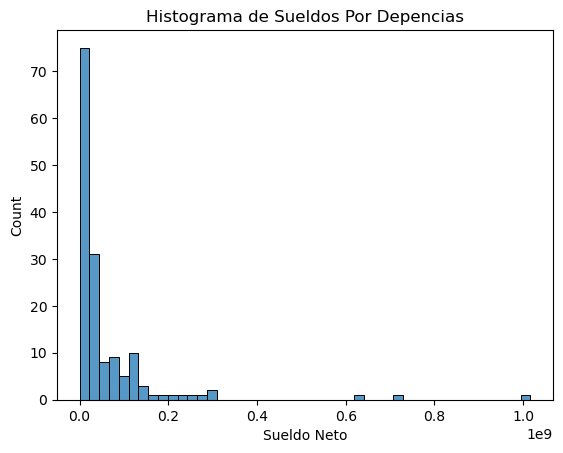

In [12]:
#Se realiza un histograma de los sueldos por dependencias:
sns.histplot(data = Sueldos_Dependencia, x="Sueldo Neto")
plt.title("Histograma de Sueldos Por Depencias")
plt.show()


In [13]:
#Se realiza una tercera agrupación que es por fechas y se imprimen las medidas descriptivas
Sueldos_Fecha = Datos.groupby('Fecha', as_index=False).sum("Sueldo Neto")
print(Sueldos_Fecha.describe())

                     Fecha   Sueldo Neto
count                   48  4.800000e+01
mean   2021-12-15 22:30:00  1.887619e+08
min    2019-12-01 00:00:00  1.440828e+08
25%    2020-11-23 12:00:00  1.679641e+08
50%    2021-12-17 00:00:00  1.848314e+08
75%    2023-01-08 18:00:00  1.958211e+08
max    2024-01-01 00:00:00  2.855969e+08
std                    NaN  3.149382e+07


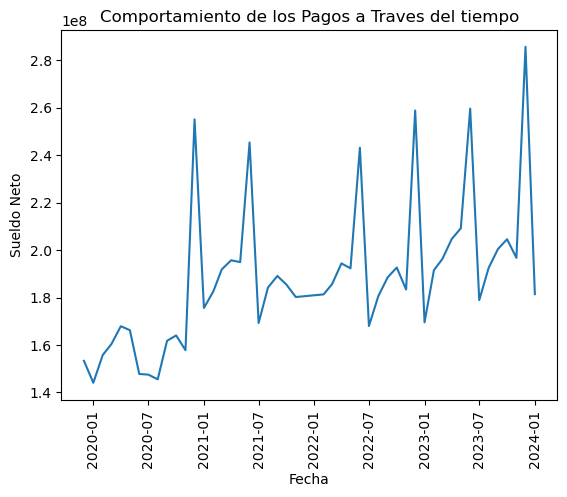

In [14]:
sns.lineplot(data=Sueldos_Fecha, x="Fecha", y="Sueldo Neto")
plt.title("Comportamiento de los Pagos a Traves del tiempo")
plt.xticks(rotation=90)
plt.show()

In [15]:
#Se genera una nueva columna donde se pone el mes del pago para agrupar por més y obtener cuanto dinero se ha pagado al personal por mes.
Sueldo_Mes = Datos
Sueldo_Mes['Mes'] = Datos['Fecha'].dt.month
Sueldo_Mes = Sueldo_Mes.groupby('Mes', as_index=False).sum("Sueldo Neto")
print(Sueldo_Mes.describe())

             Mes   Sueldo Neto
count  12.000000  1.200000e+01
mean    6.500000  7.550477e+08
std     3.605551  8.592731e+07
min     1.000000  6.637093e+08
25%     3.750000  7.090176e+08
50%     6.500000  7.369670e+08
75%     9.250000  7.626113e+08
max    12.000000  9.527182e+08


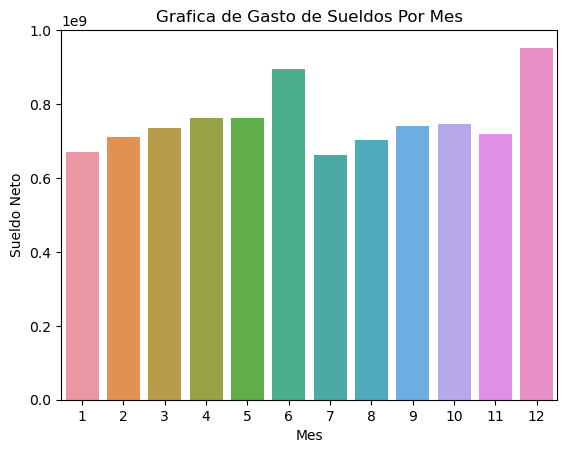

In [16]:
#Se genera una grafica de barras de la información de pagos por mes
sns.barplot(data = Sueldo_Mes, x='Mes', y = 'Sueldo Neto')
plt.title("Grafica de Gasto de Sueldos Por Mes")
plt.show()

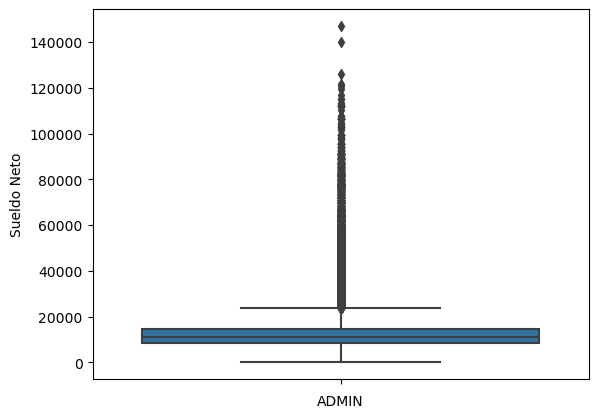

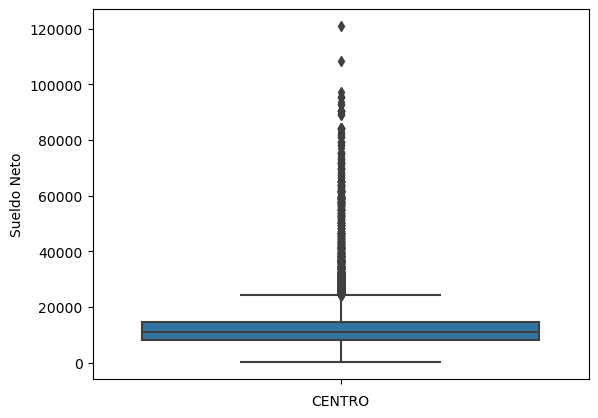

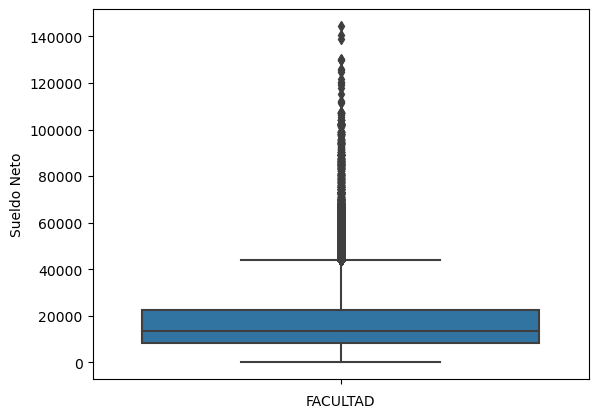

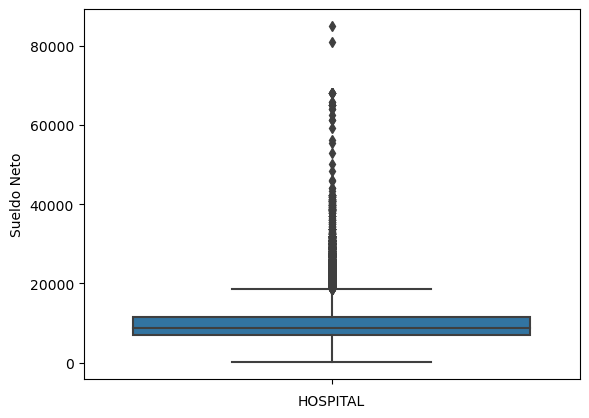

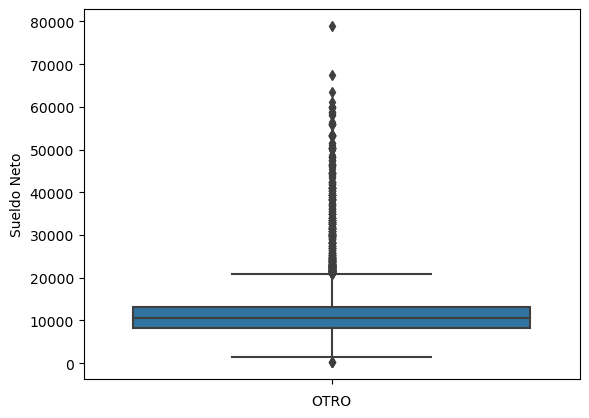

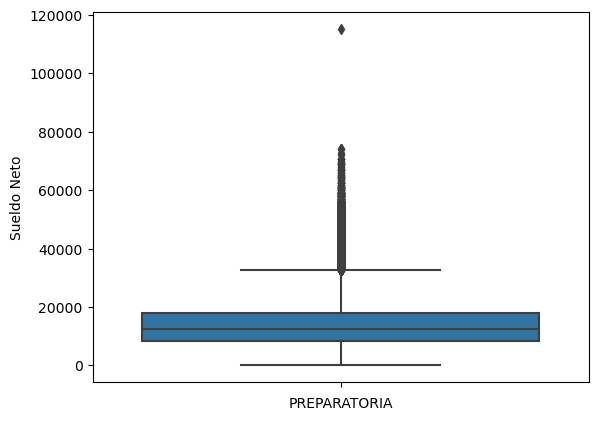

In [17]:
# Se hace un ciclo para generar imagenes a partir de la primera agrupación de sueldos_Tipo
for Tip in list(Sueldos_Tipo['Tipo']):
    df_temp = Datos.loc[Datos['Tipo'] == Tip]
    plt.figure()
    sns.boxplot(y = df_temp["Sueldo Neto"])
    plt.xlabel(Tip)
    plt.show
    plt.savefig('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Aprendizaje automatico/Tareas/Tarea 1/Sueldo por Tipo/Boxplot Sueldos '+Tip+'.png', bbox_inches = 'tight')
    
    

C:\Users\alvar\AppData\Local\Temp\ipykernel_28404\2781256122.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


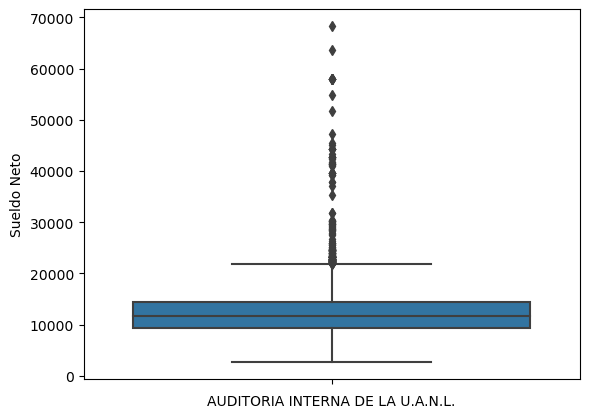

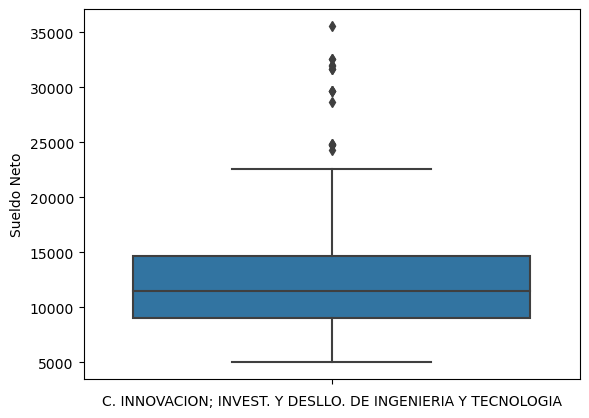

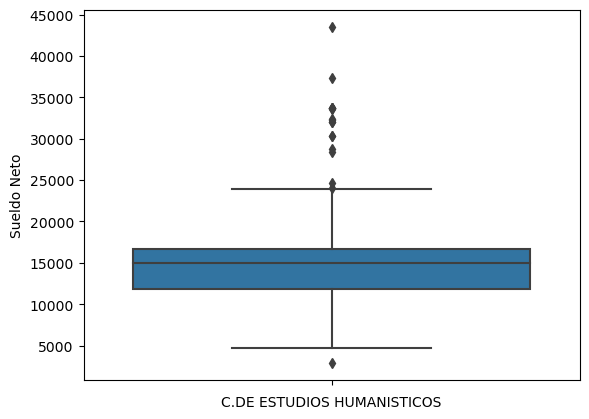

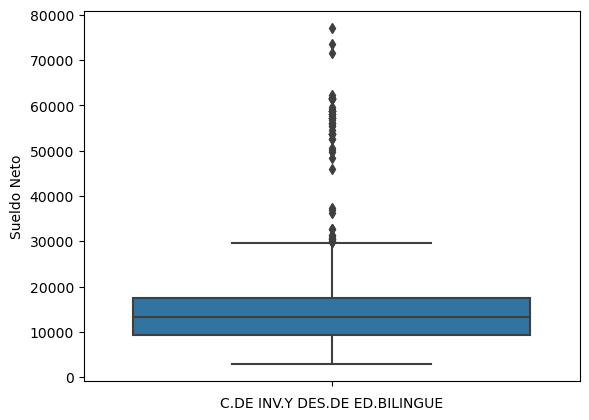

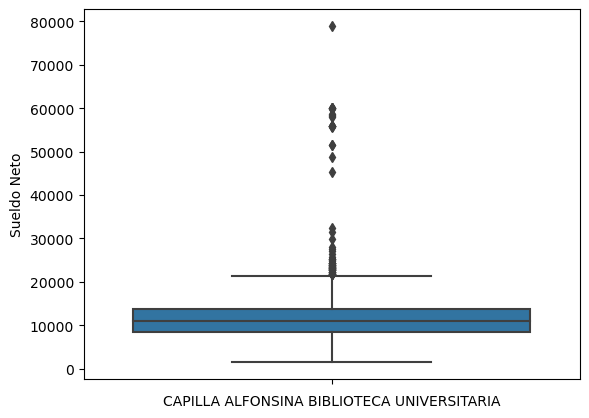

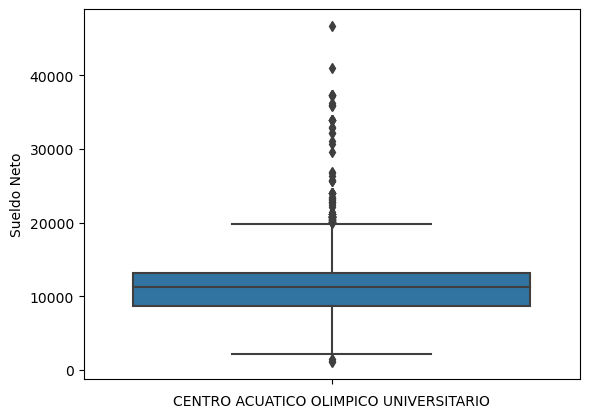

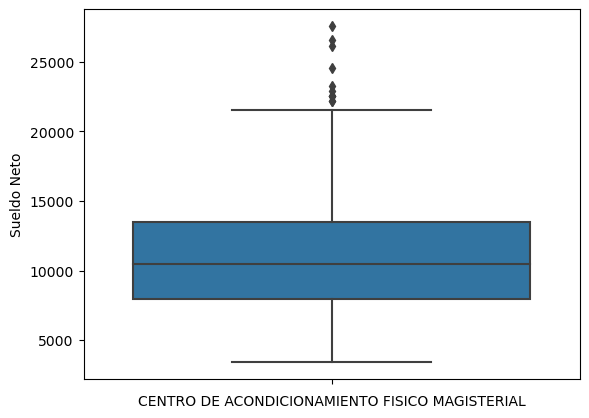

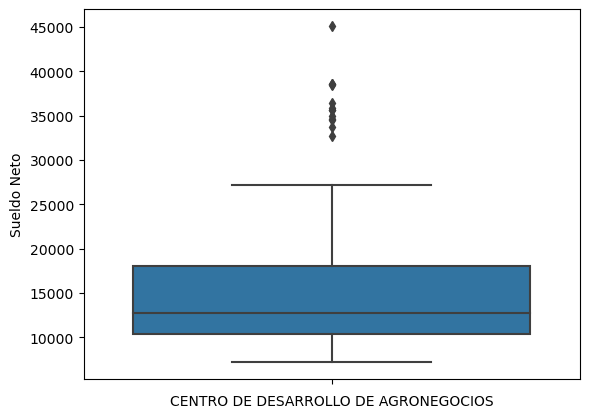

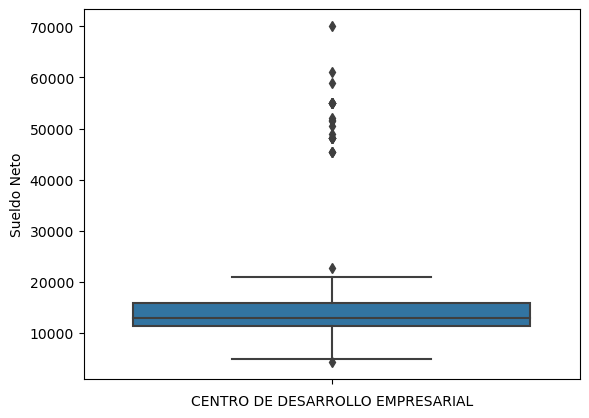

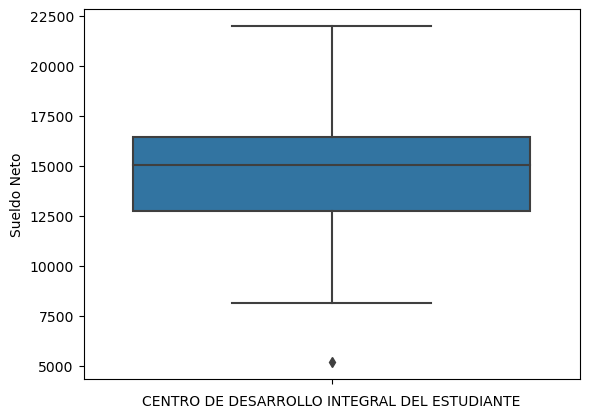

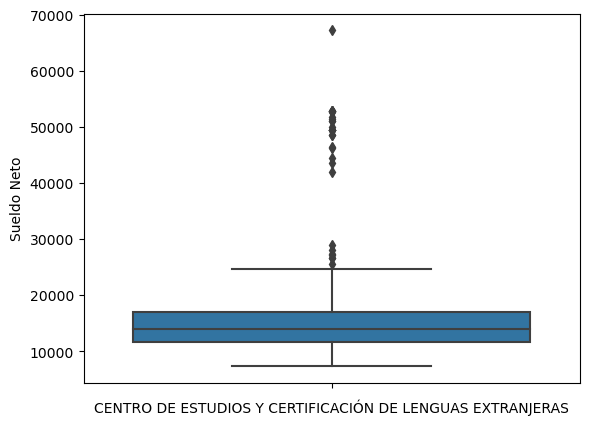

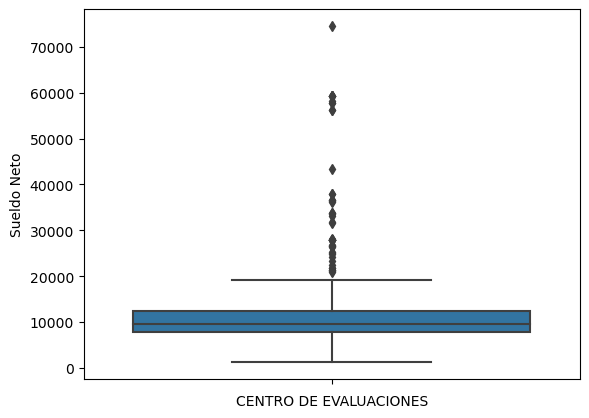

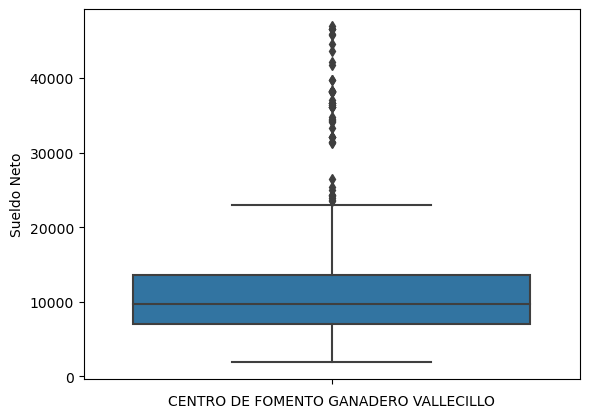

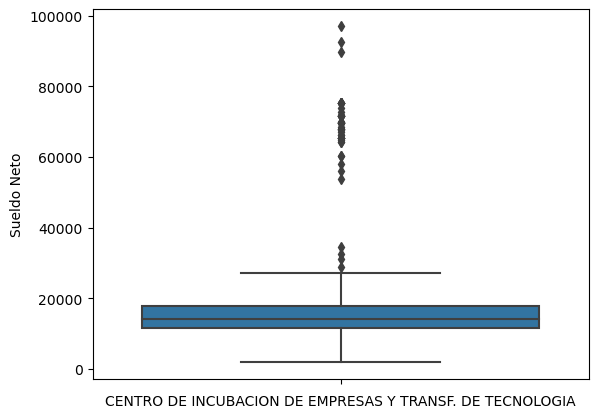

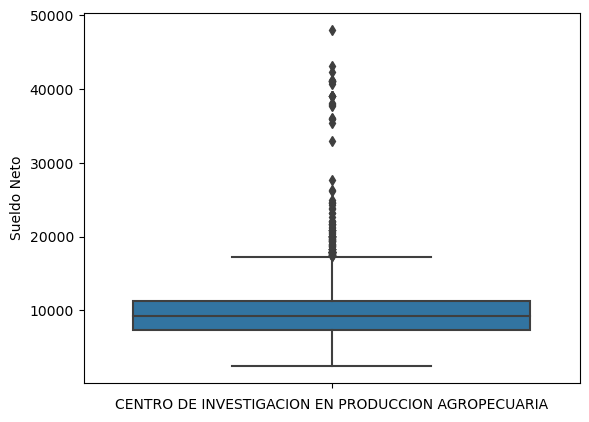

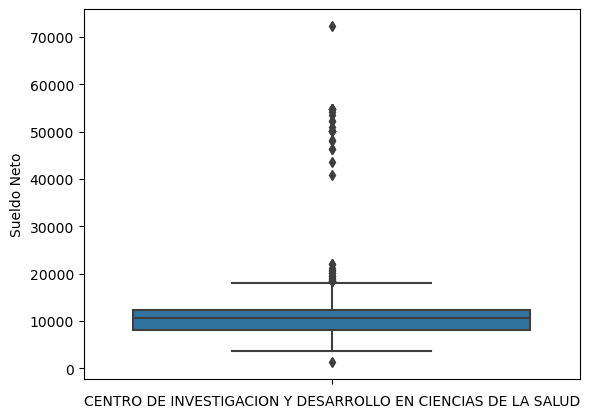

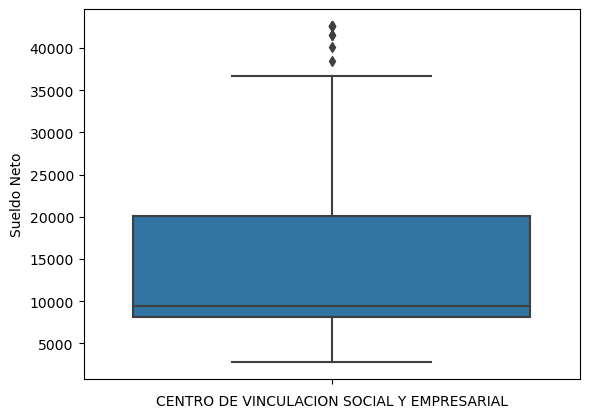

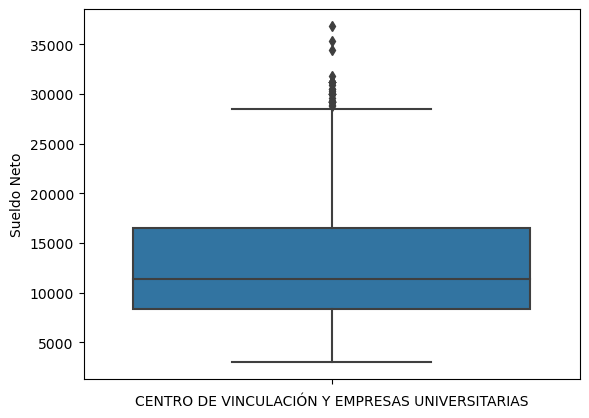

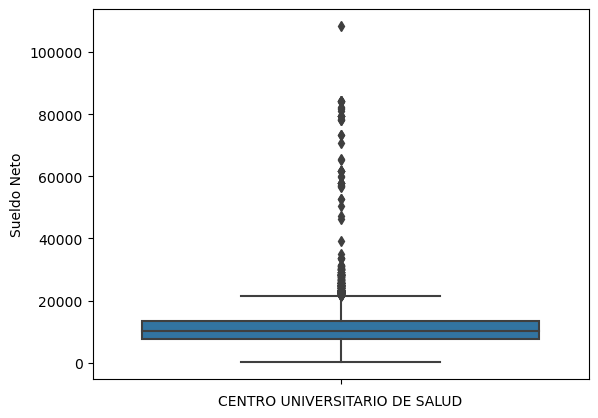

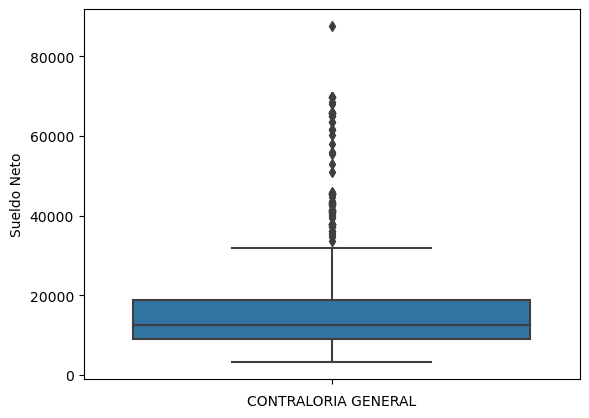

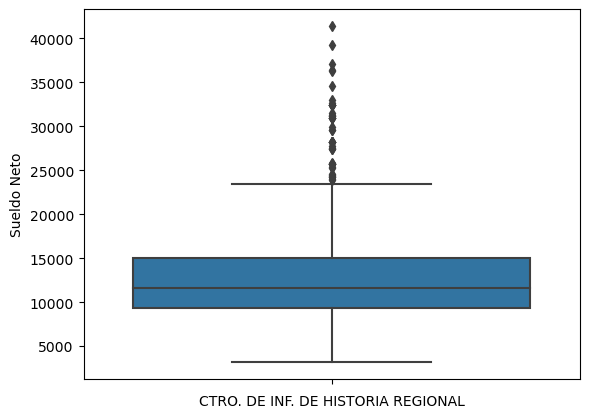

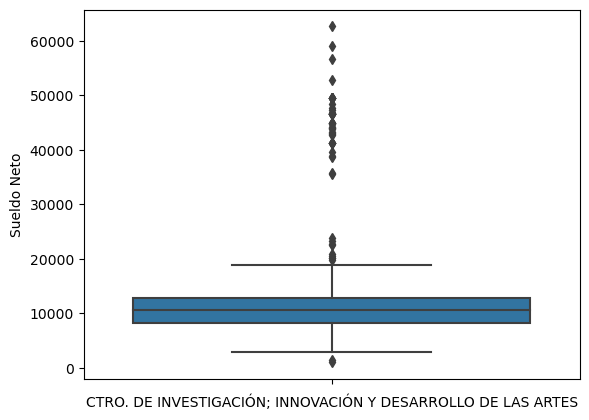

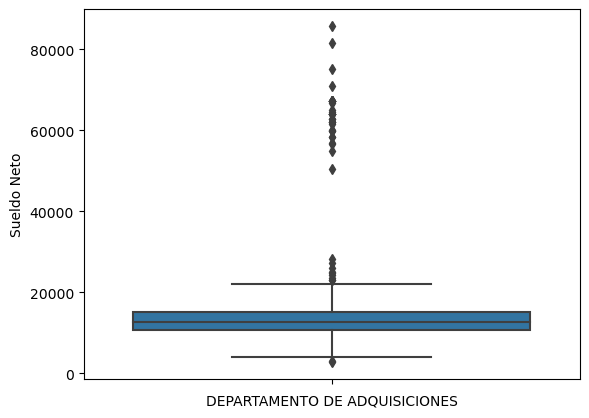

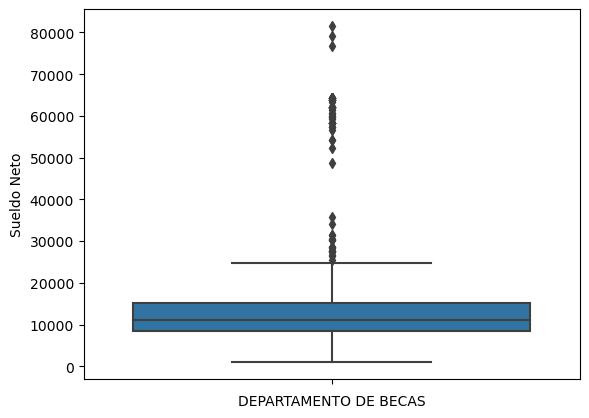

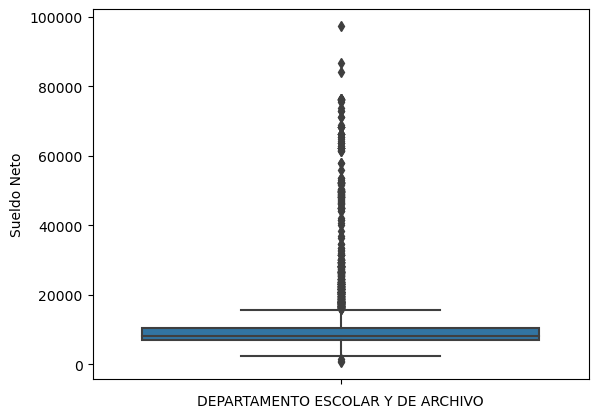

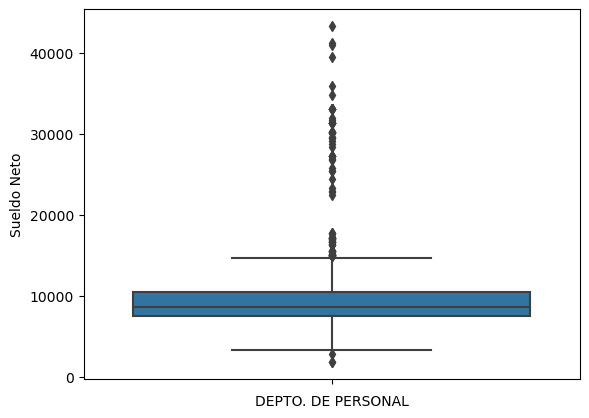

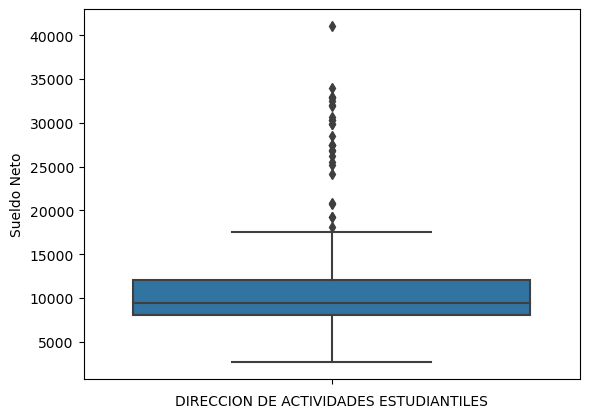

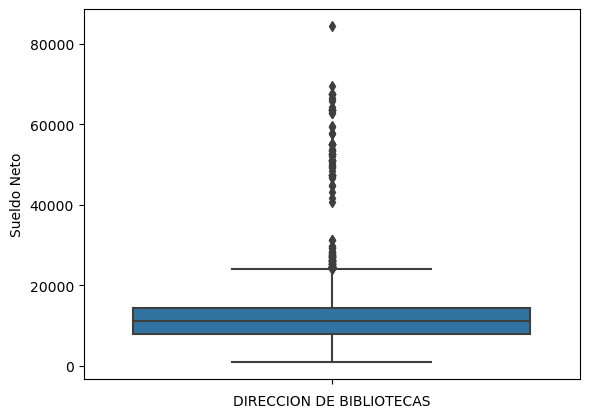

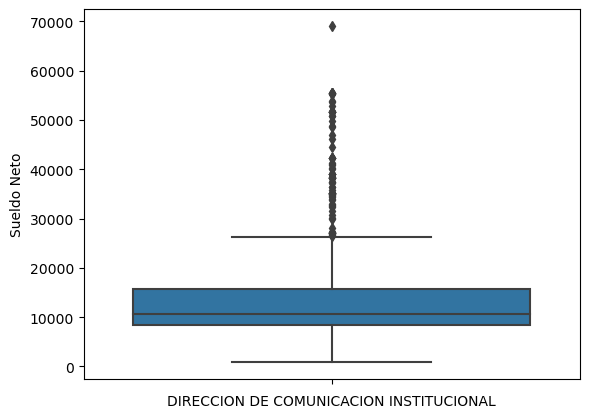

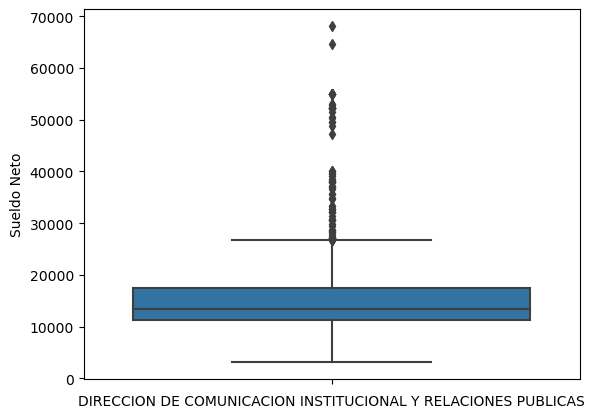

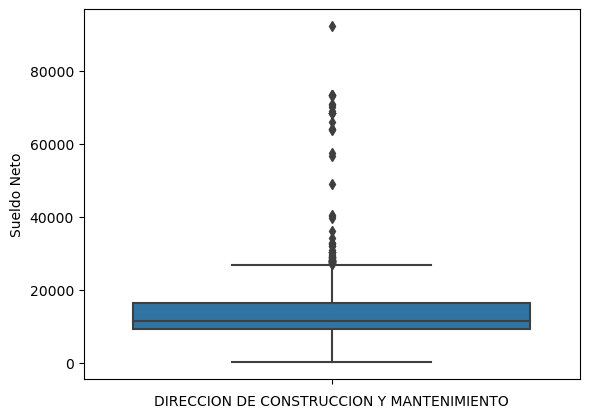

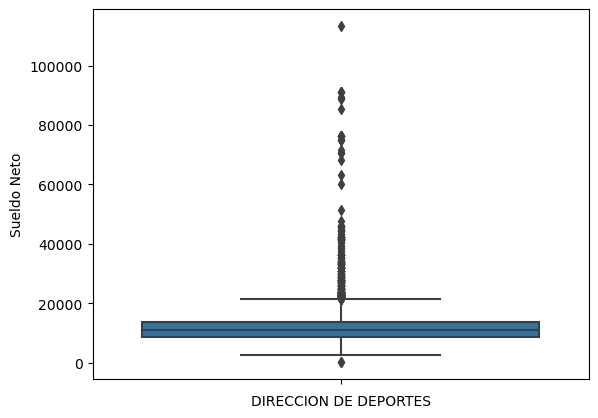

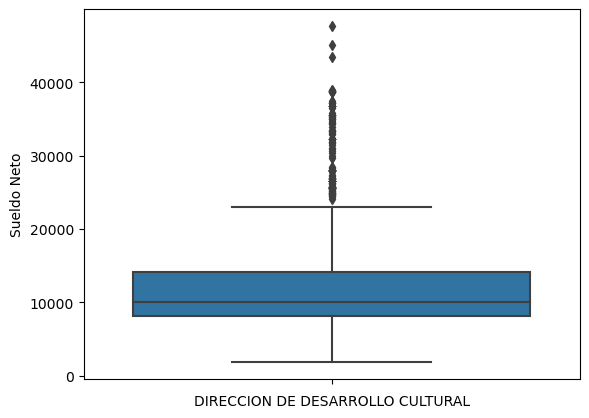

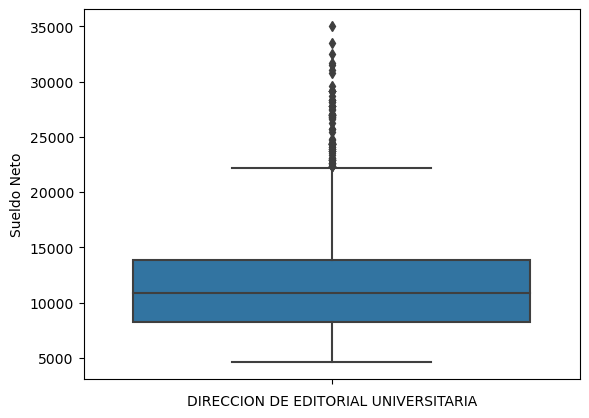

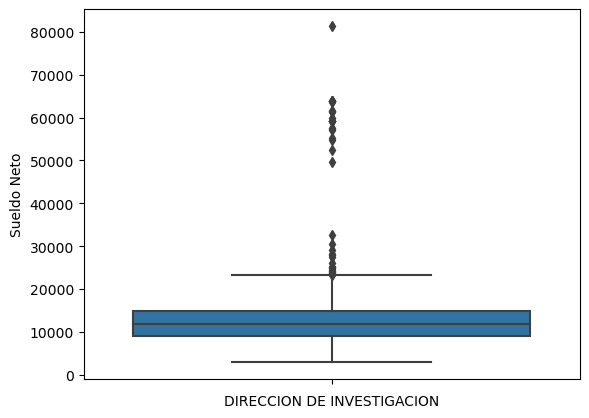

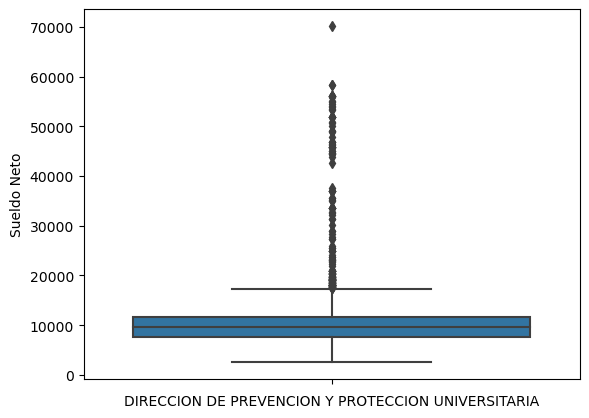

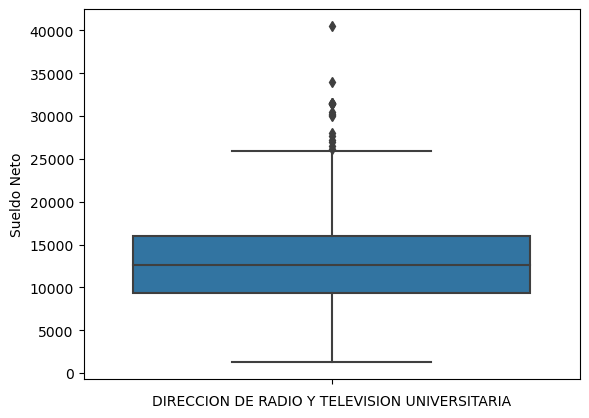

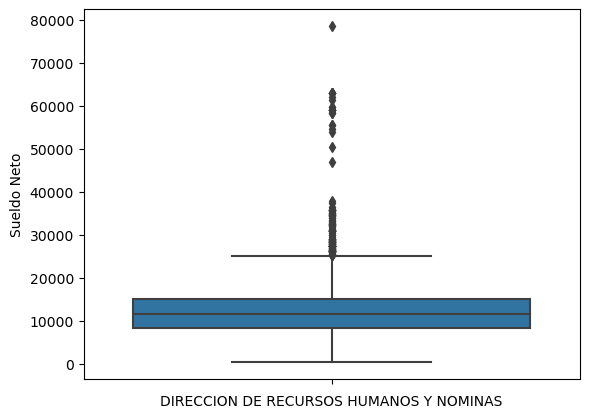

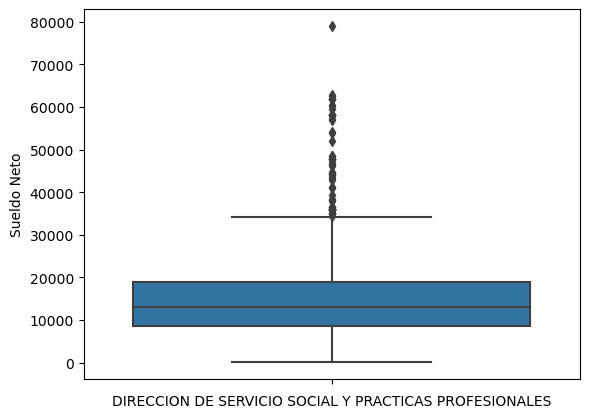

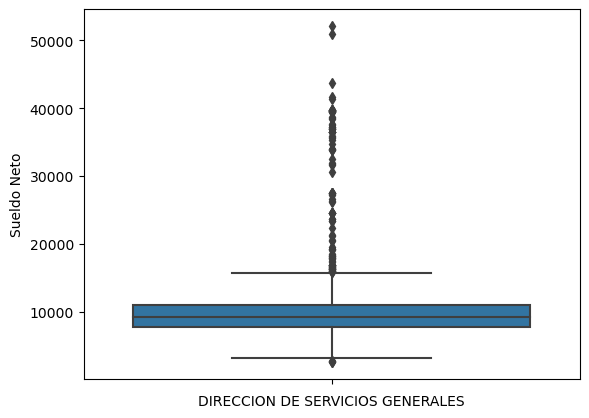

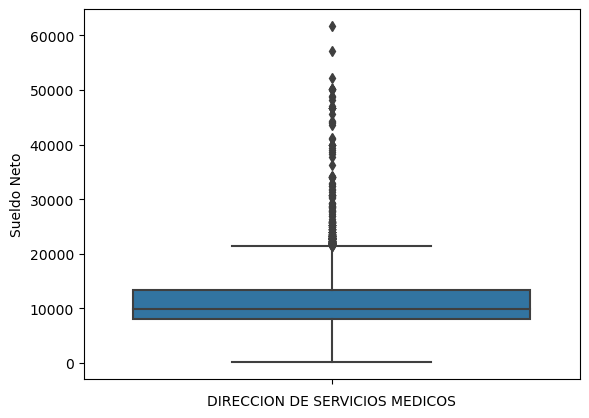

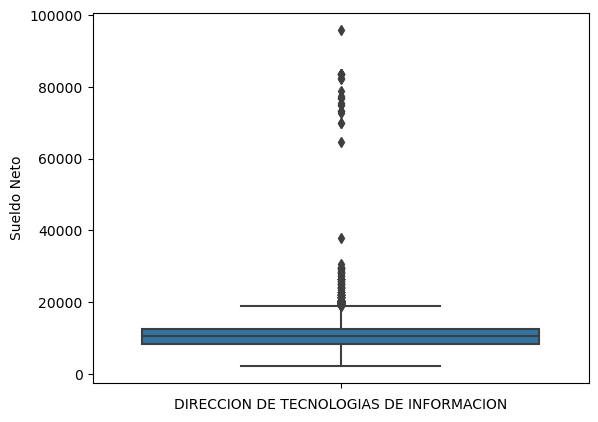

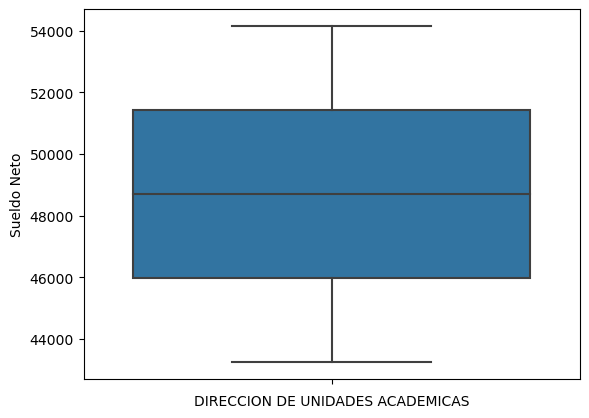

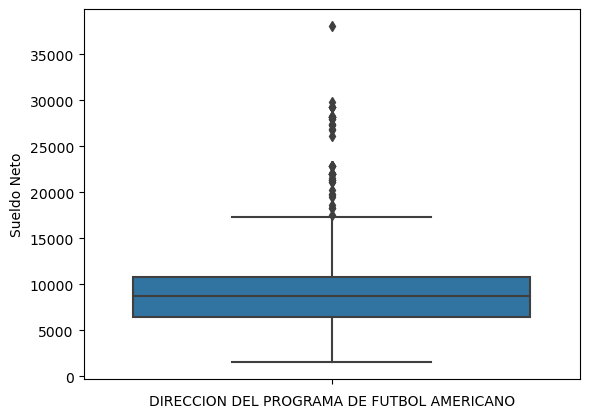

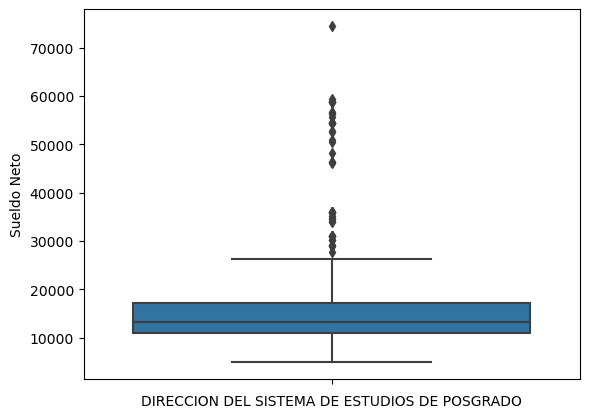

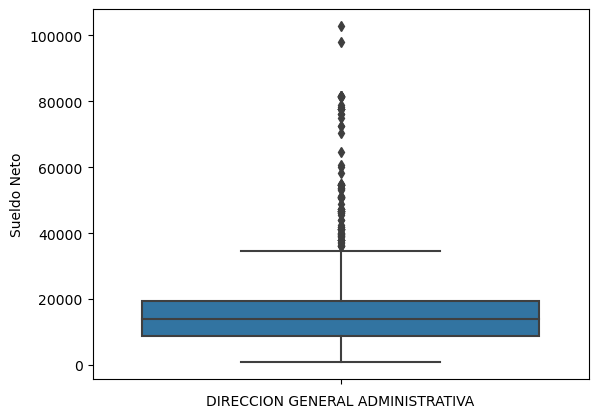

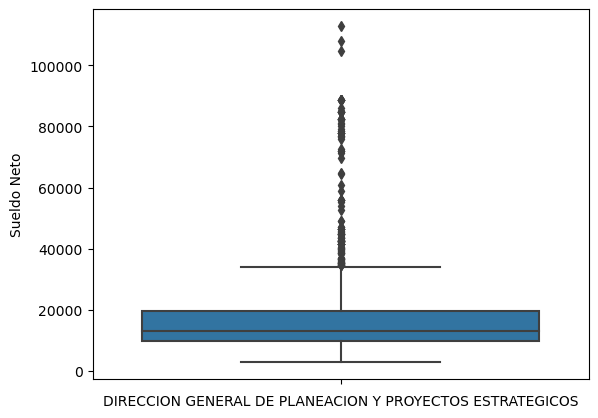

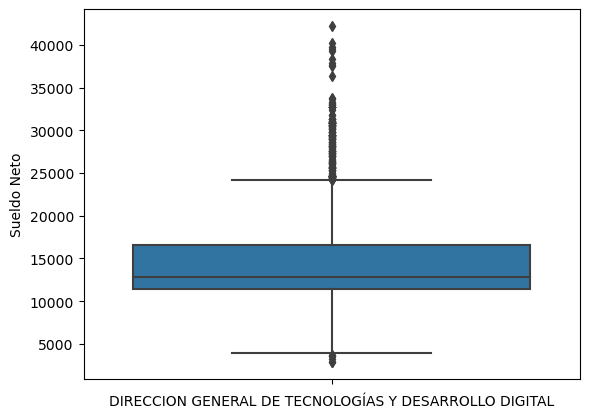

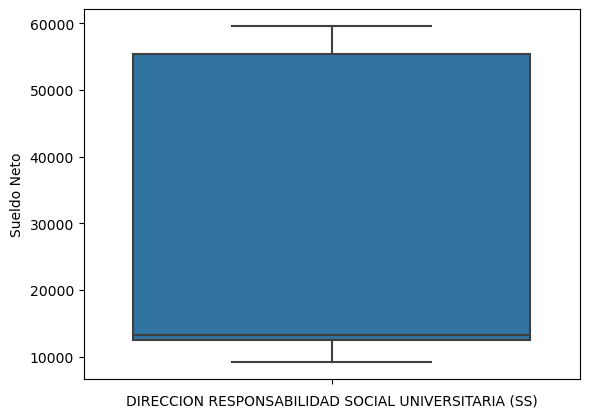

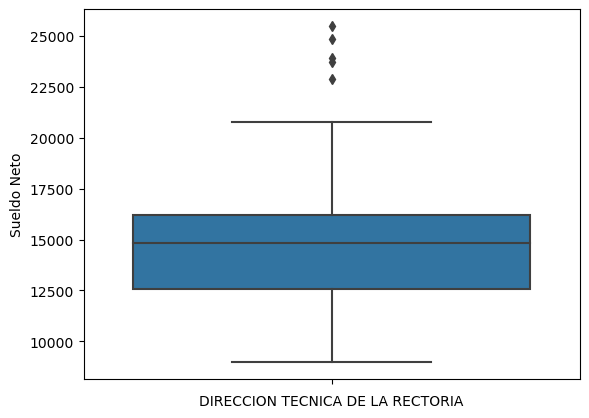

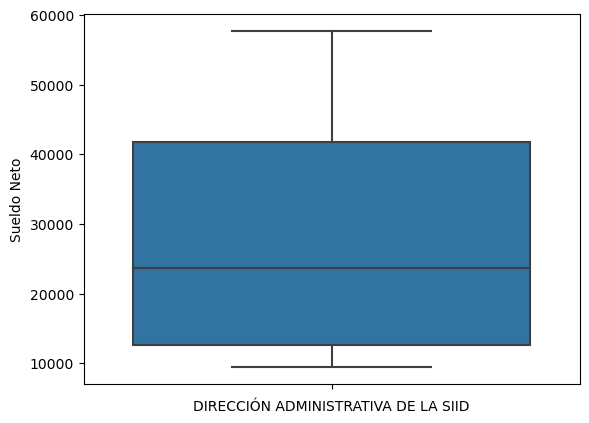

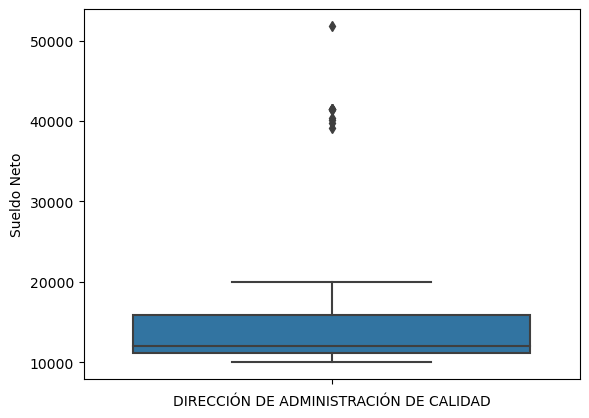

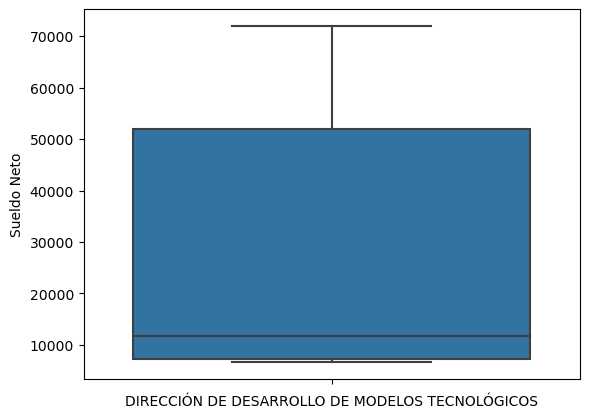

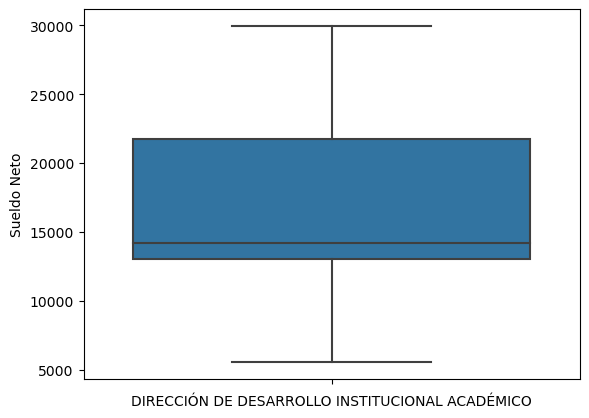

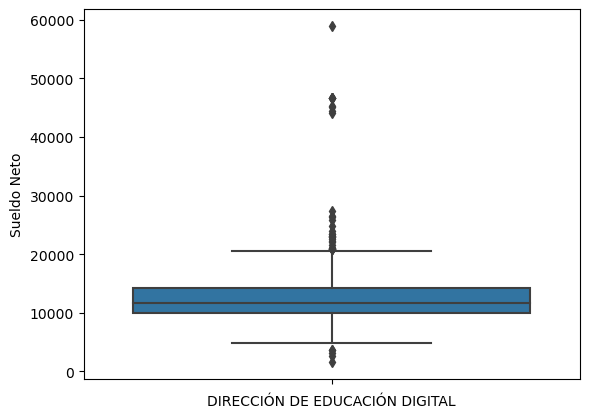

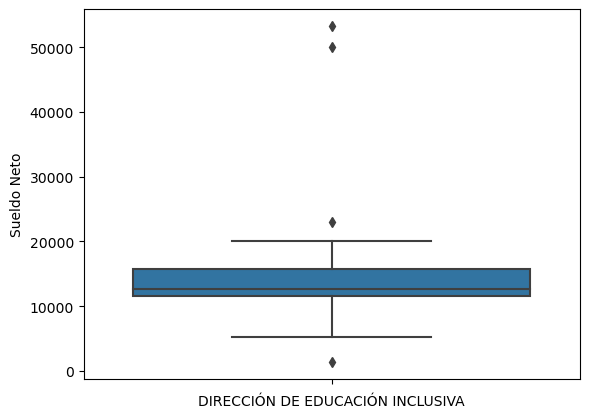

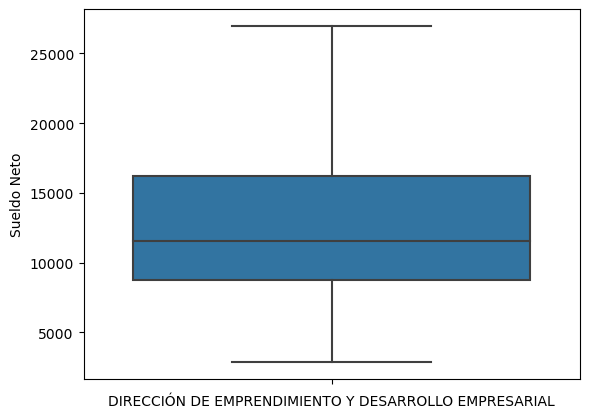

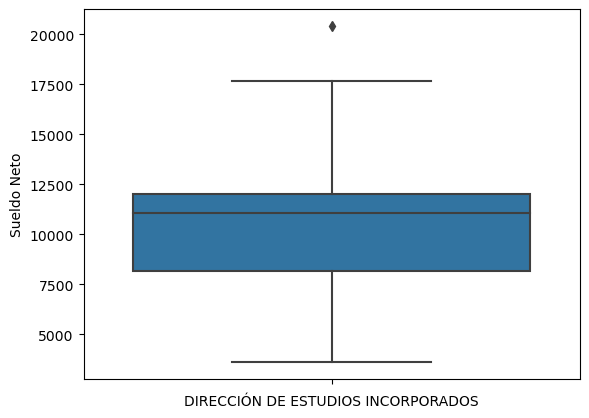

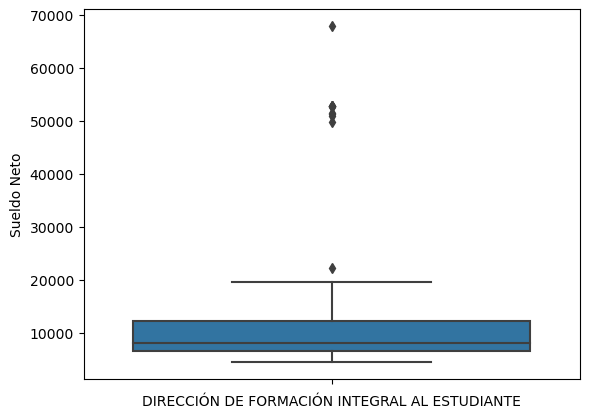

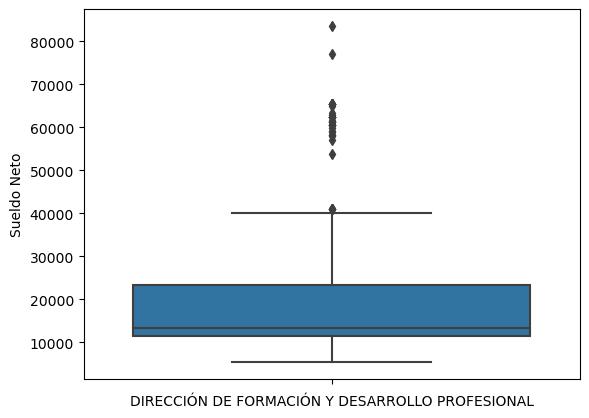

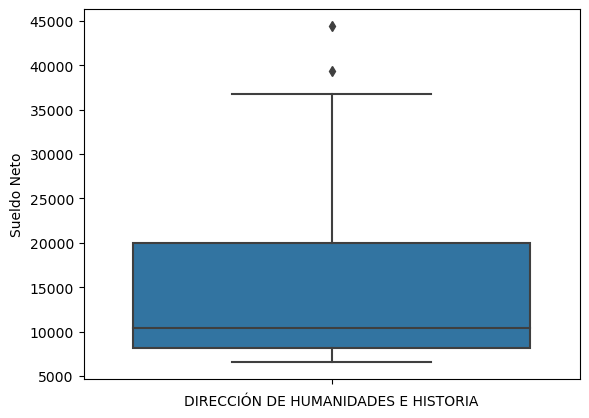

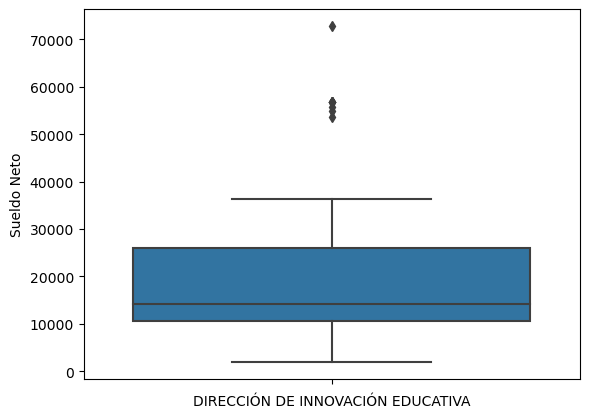

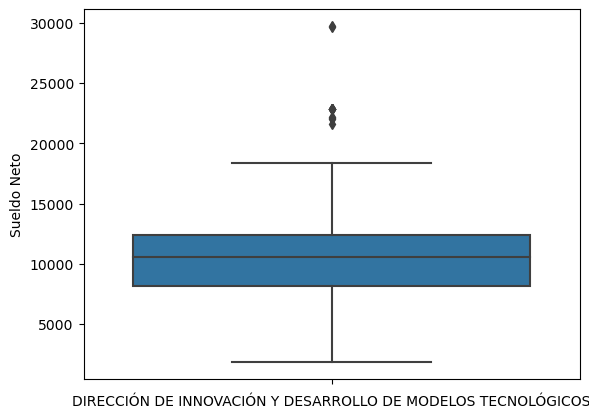

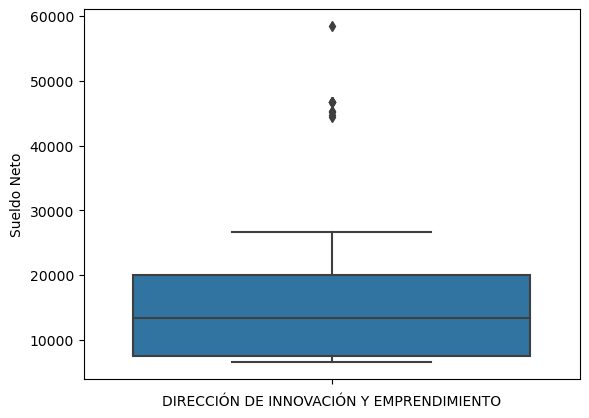

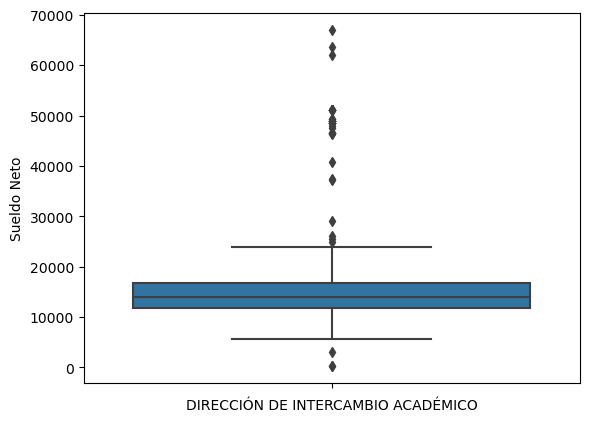

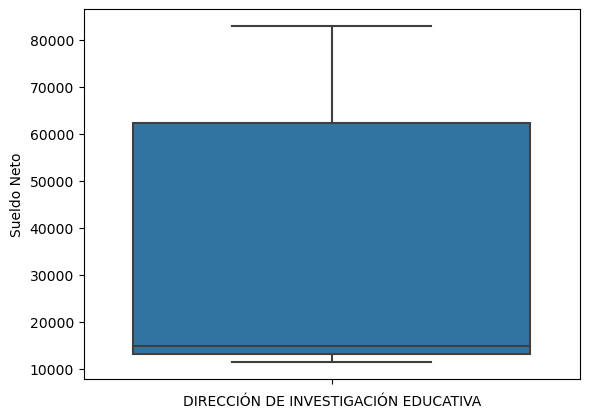

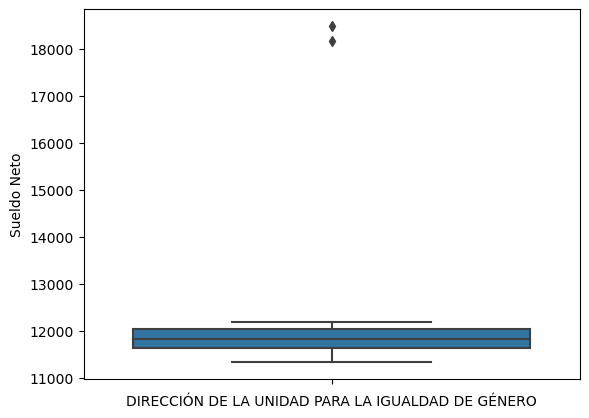

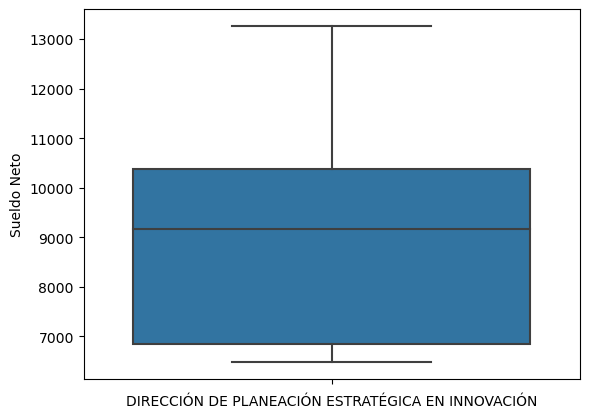

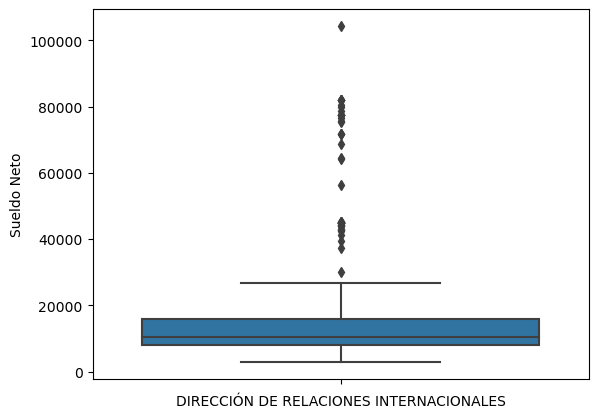

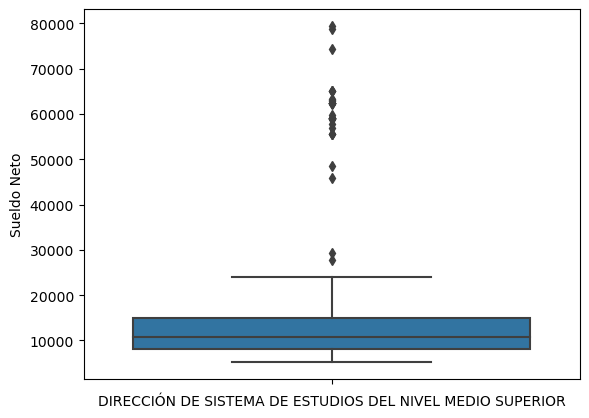

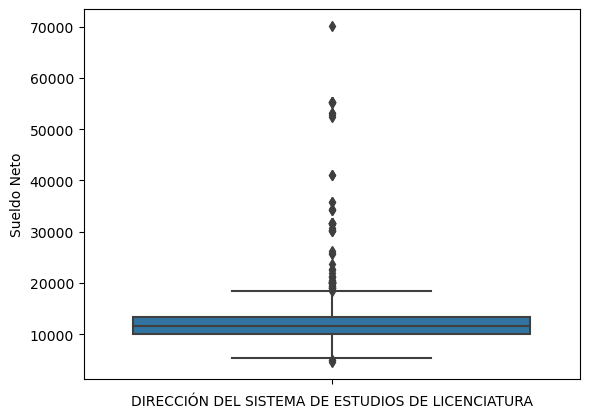

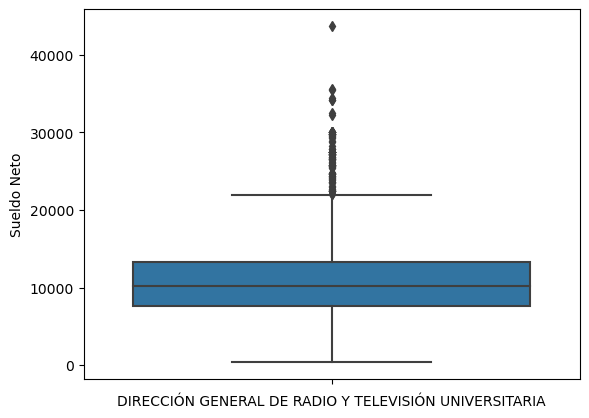

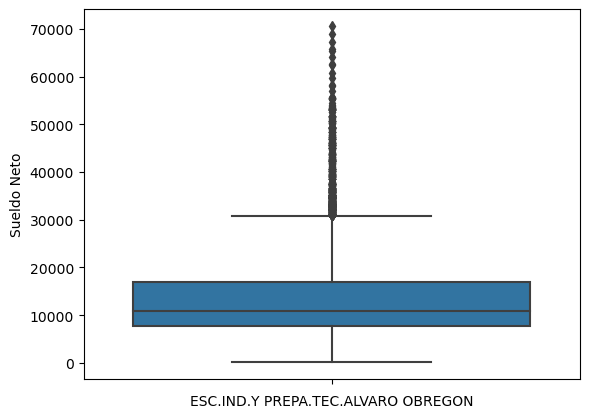

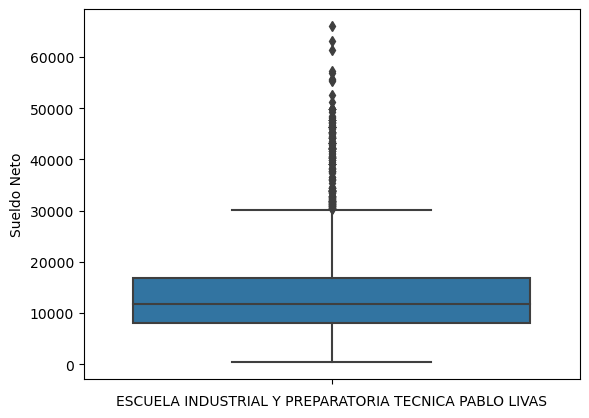

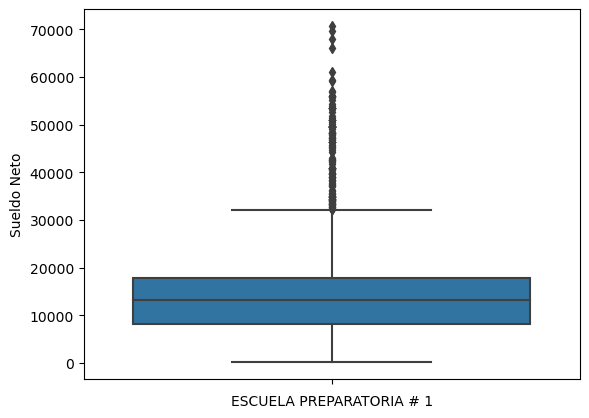

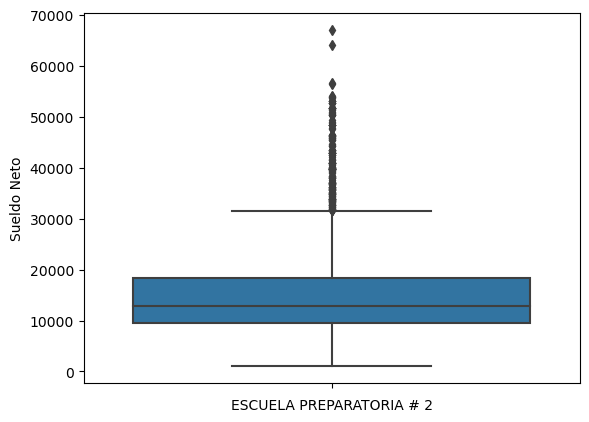

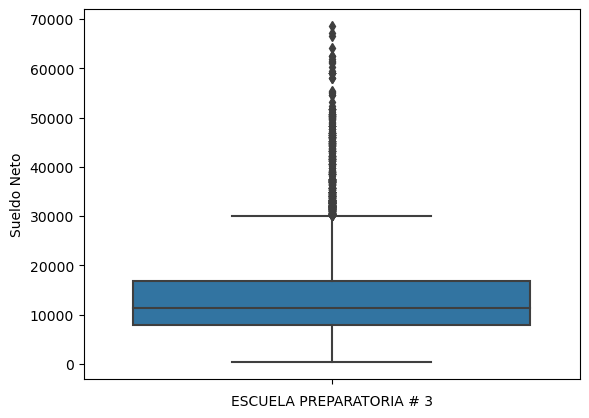

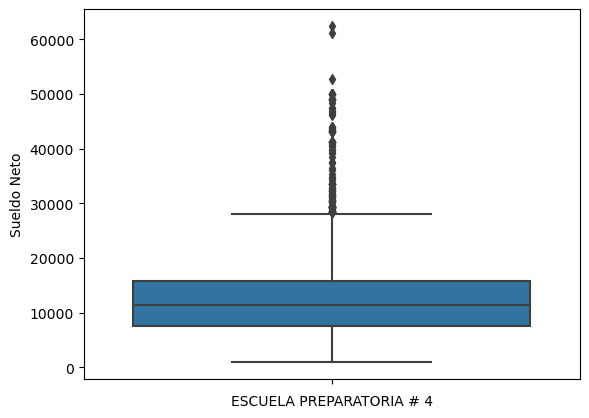

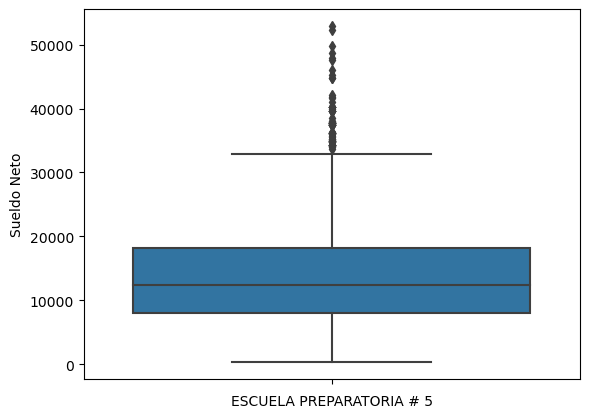

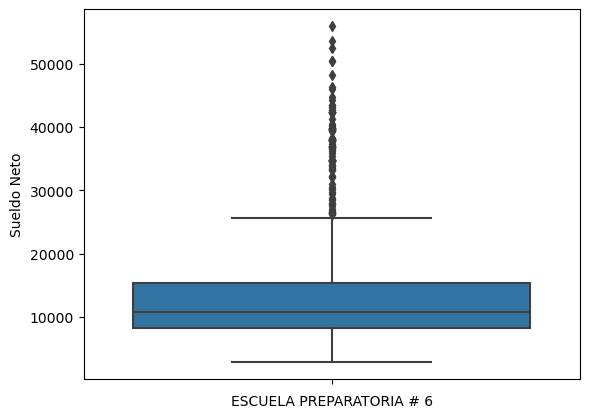

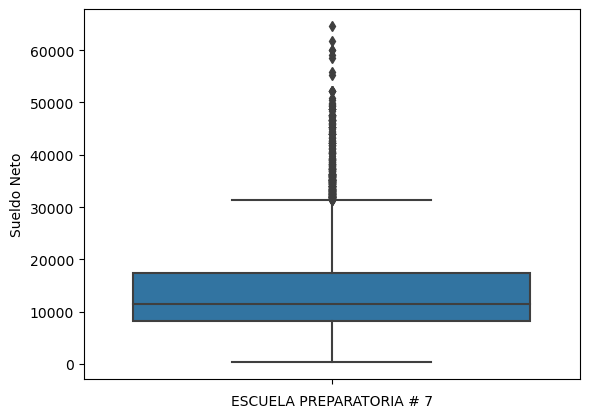

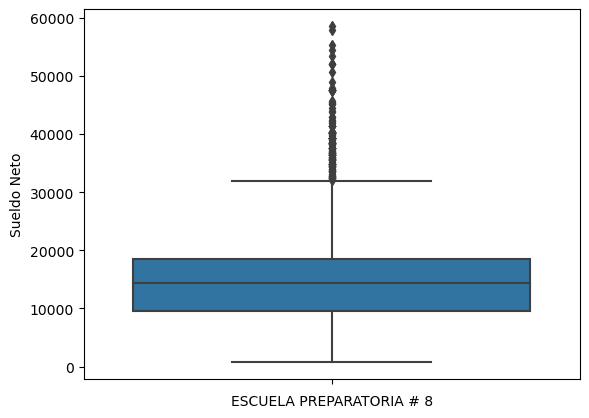

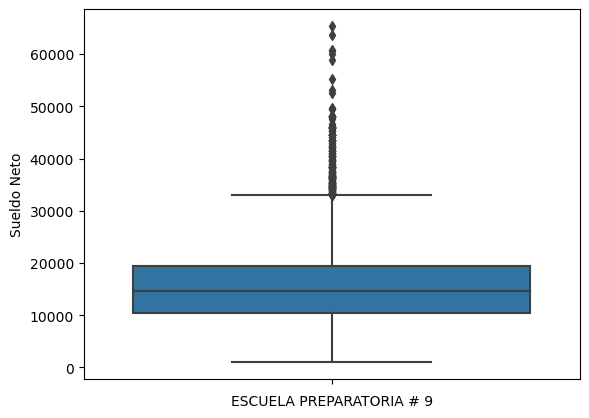

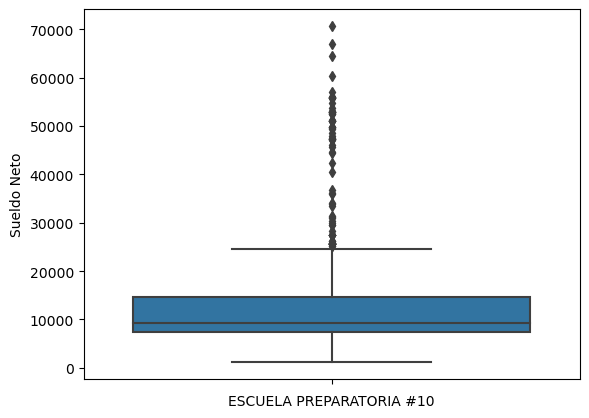

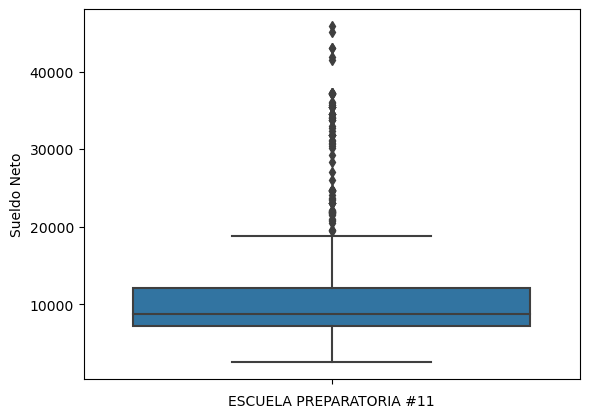

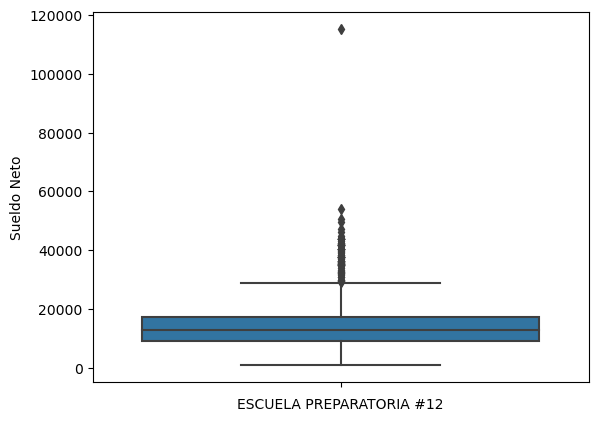

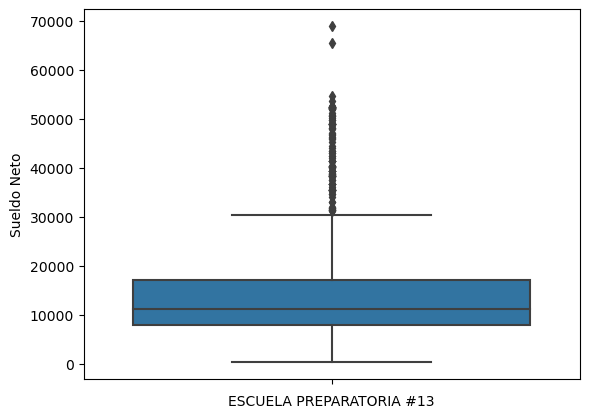

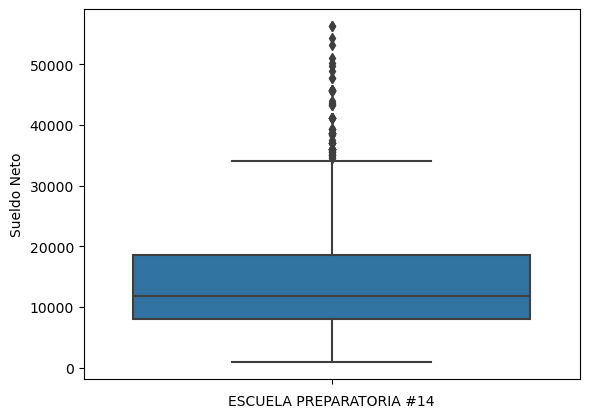

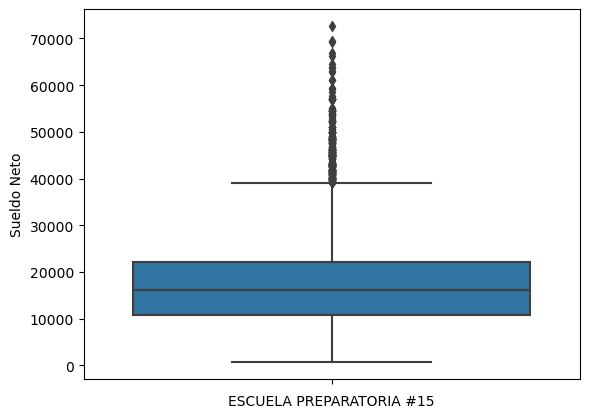

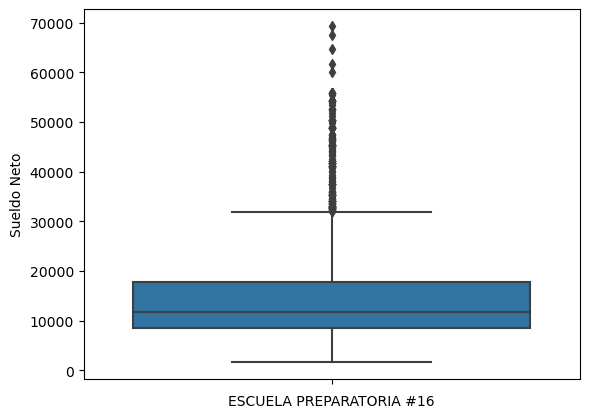

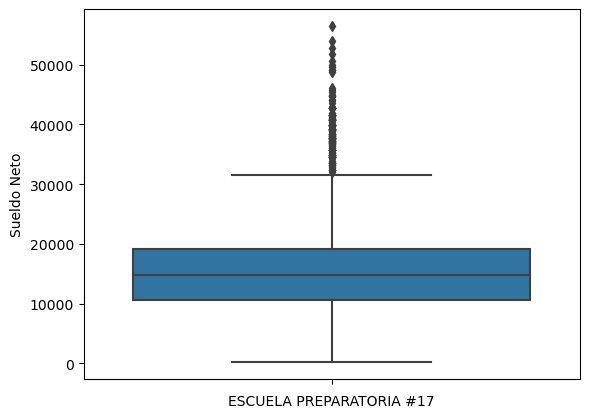

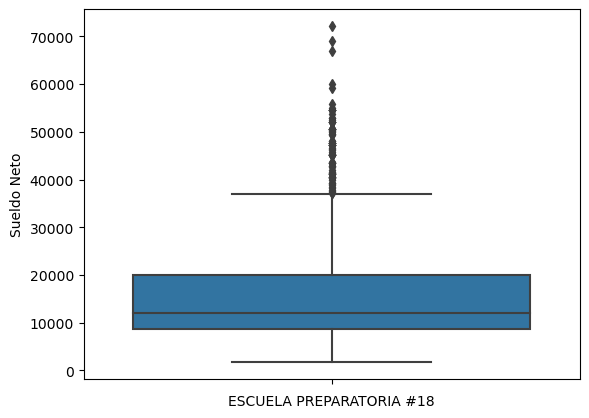

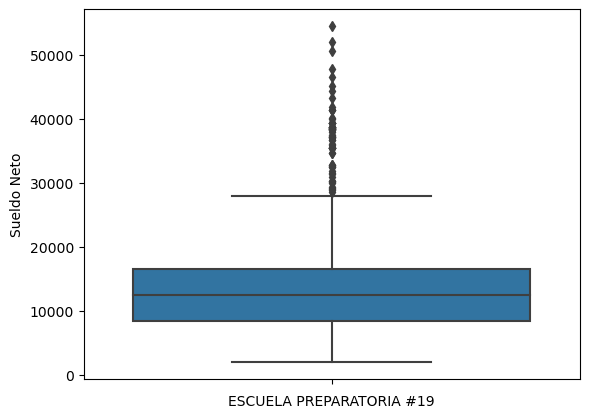

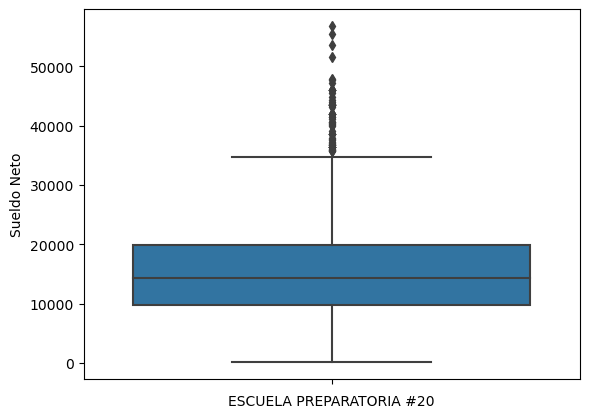

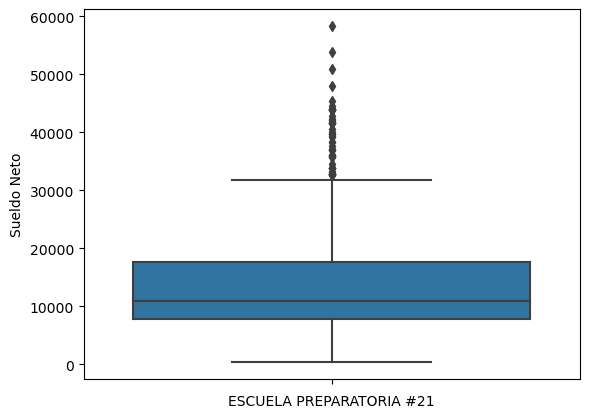

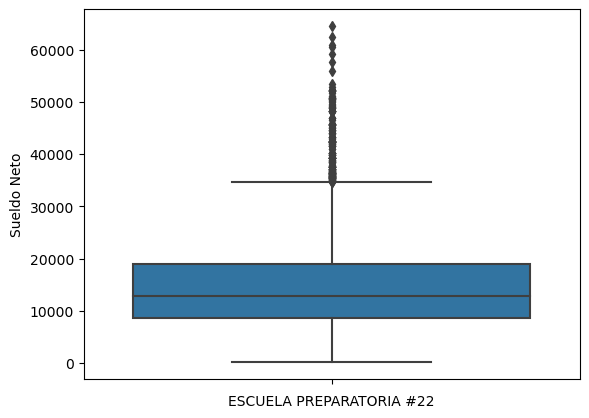

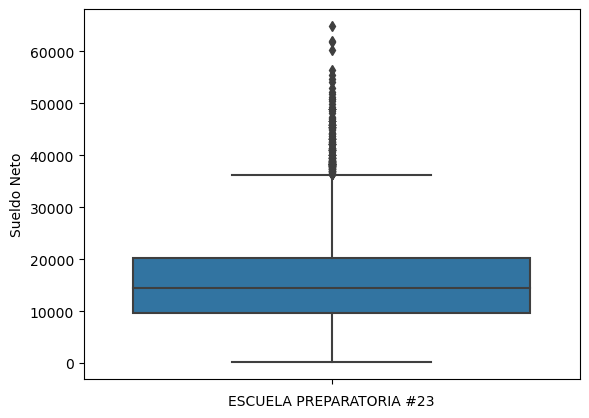

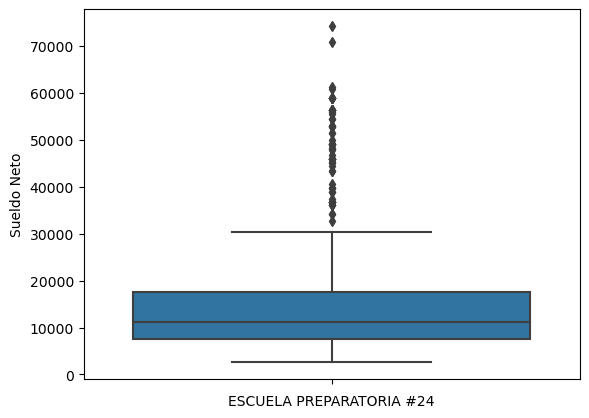

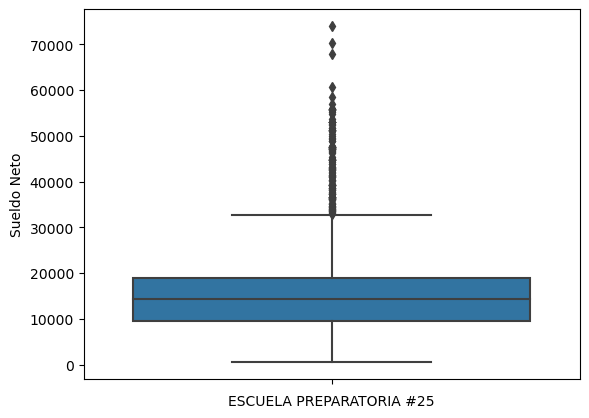

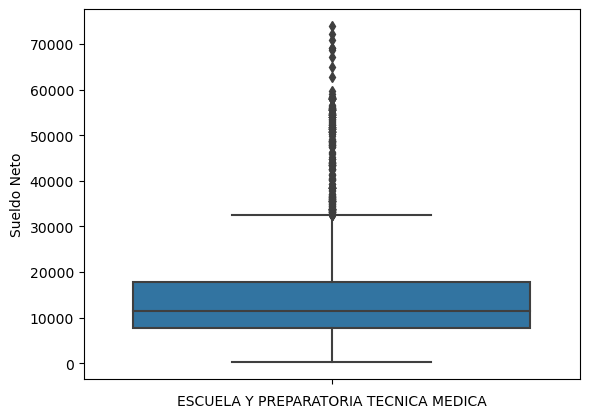

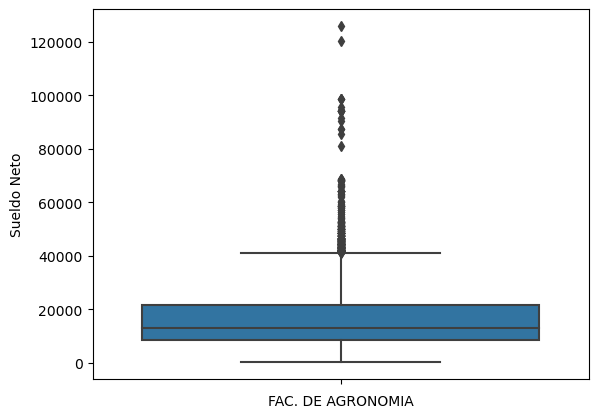

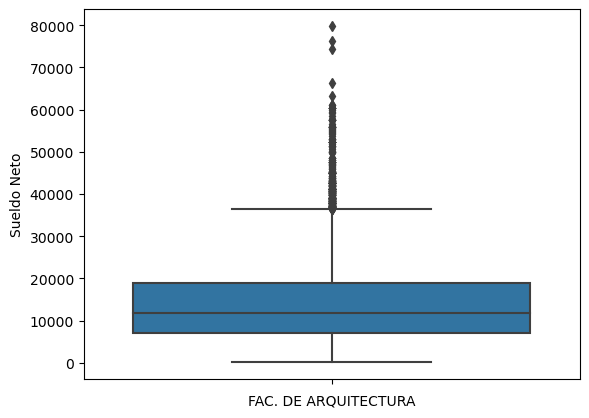

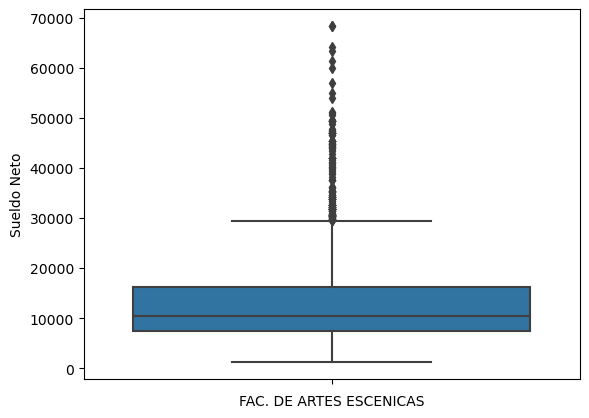

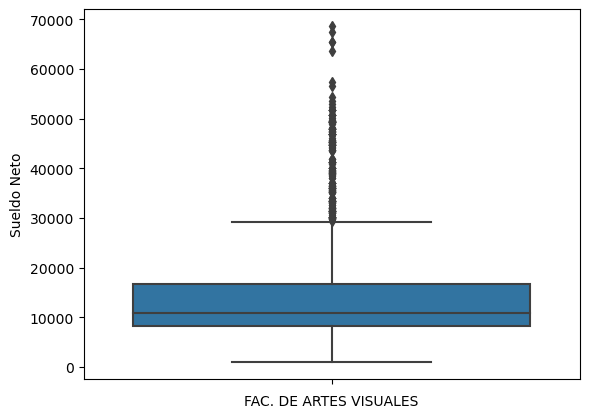

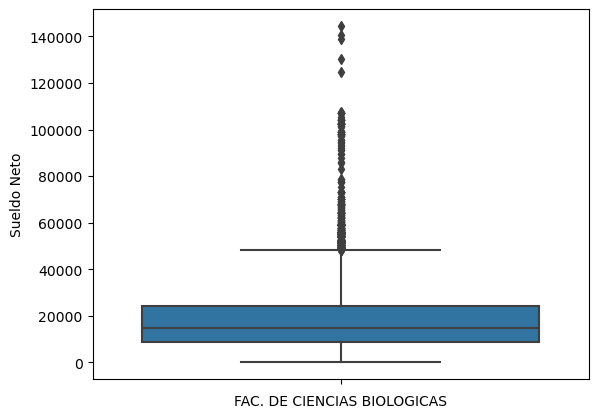

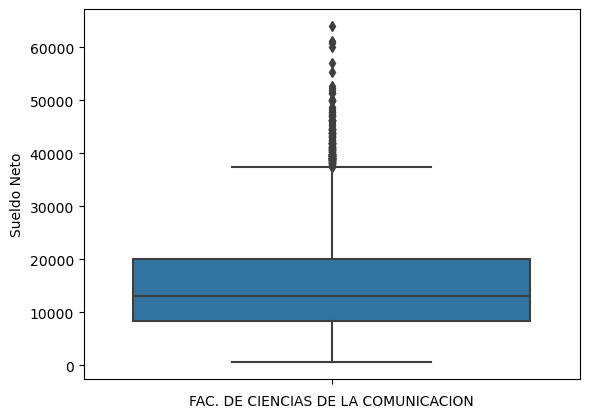

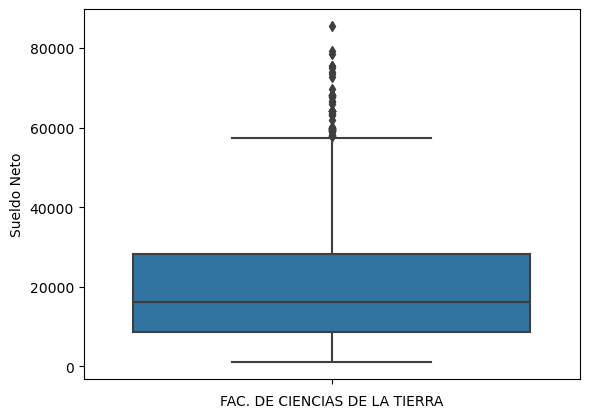

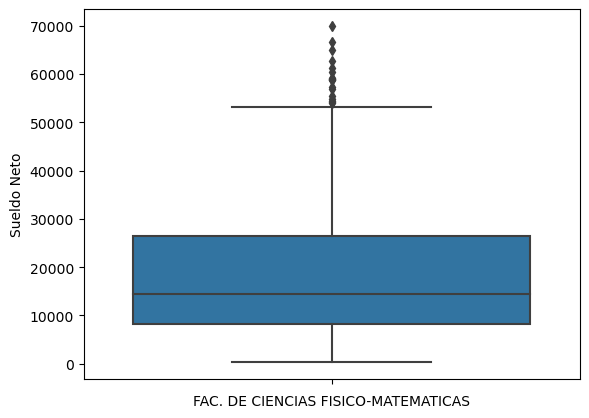

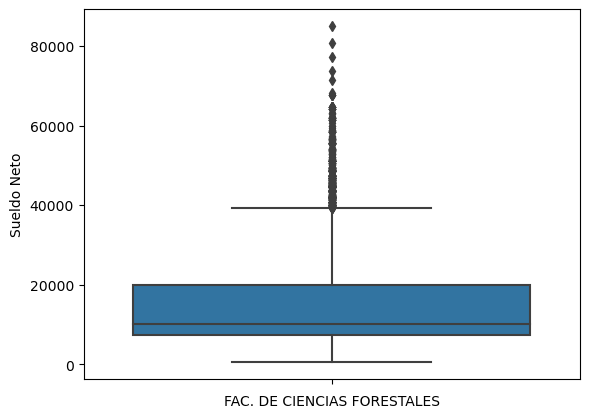

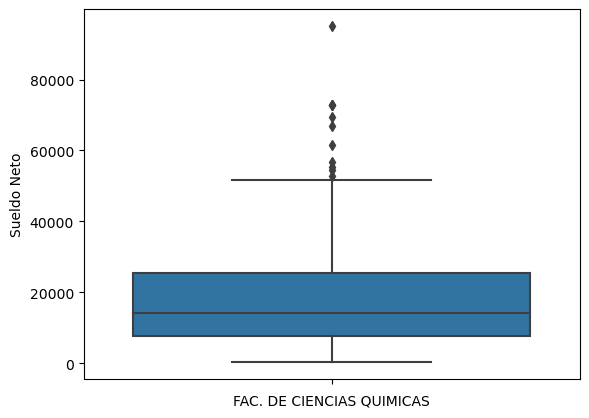

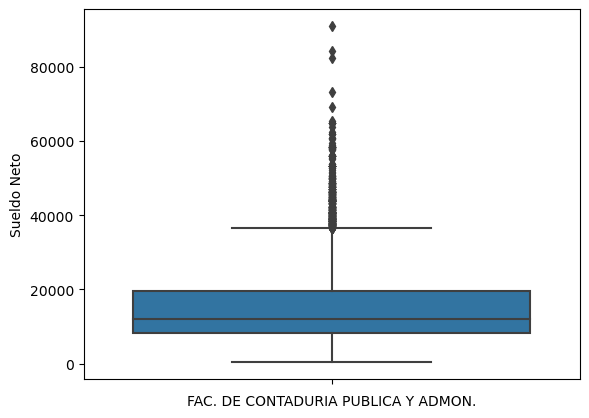

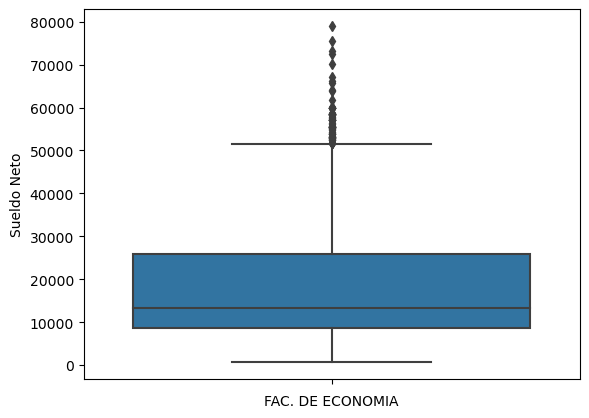

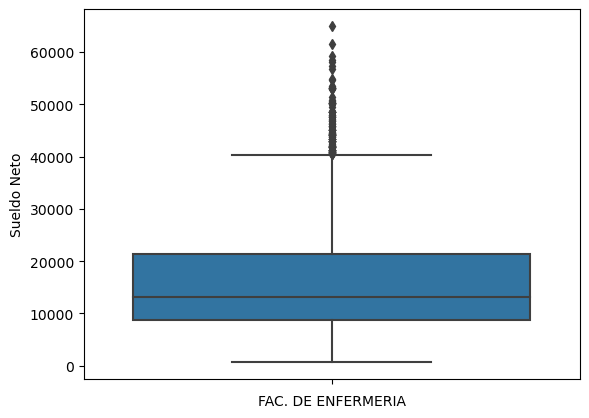

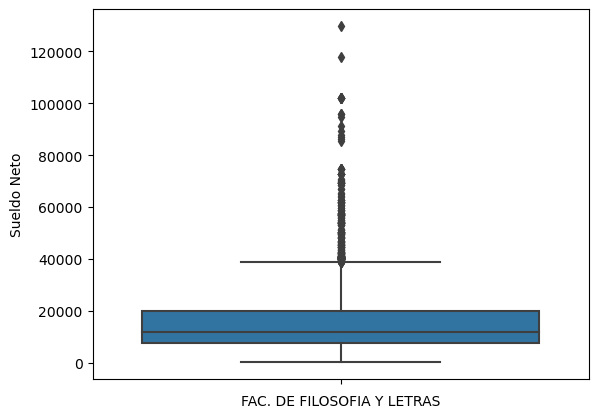

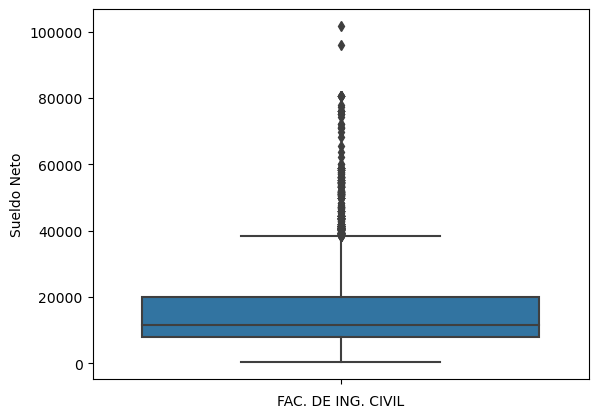

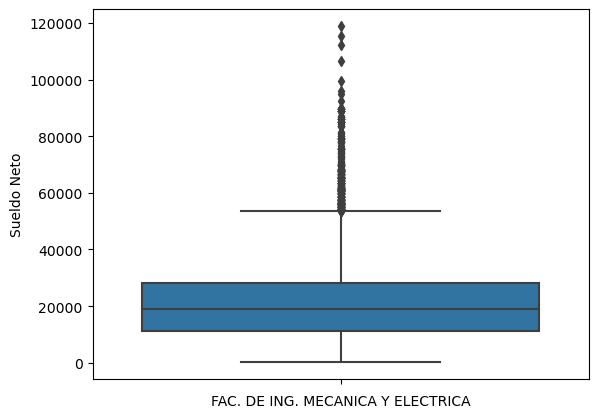

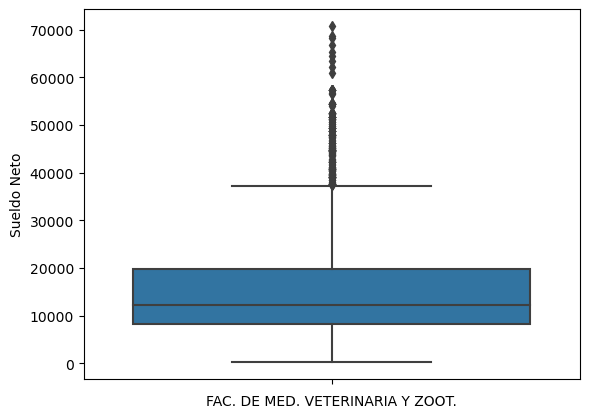

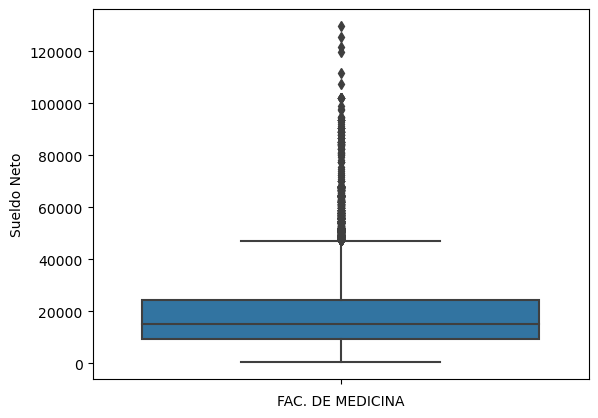

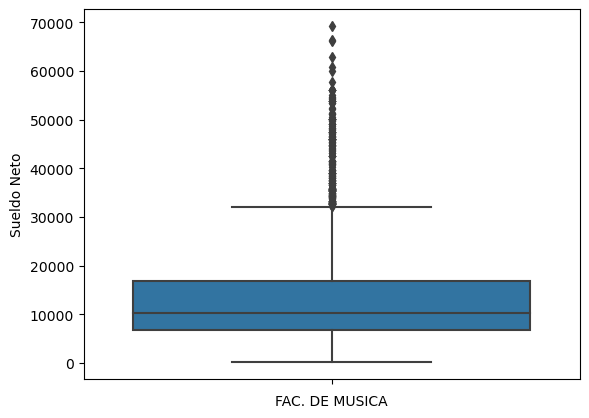

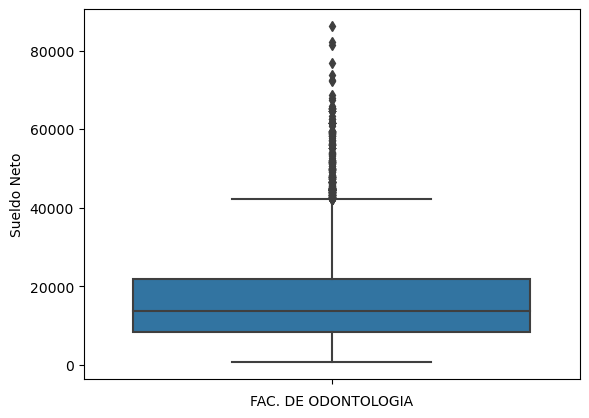

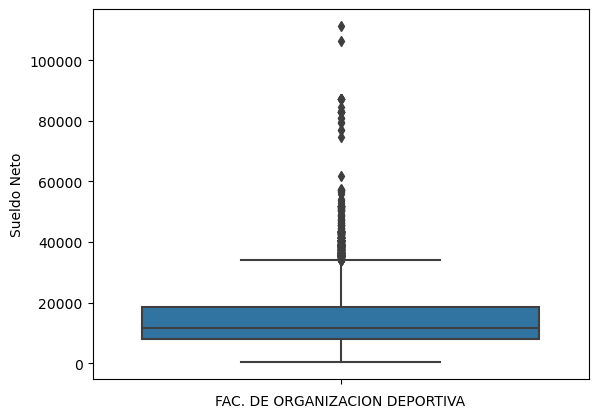

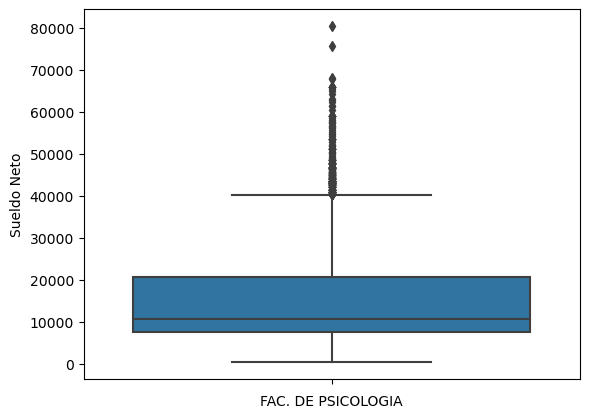

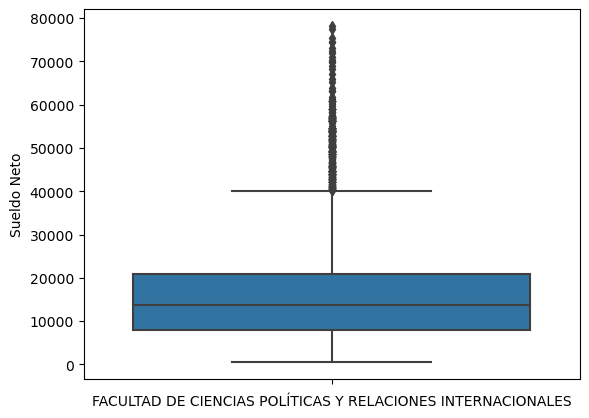

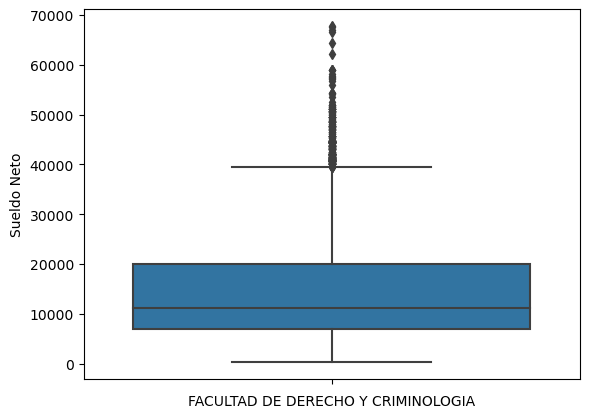

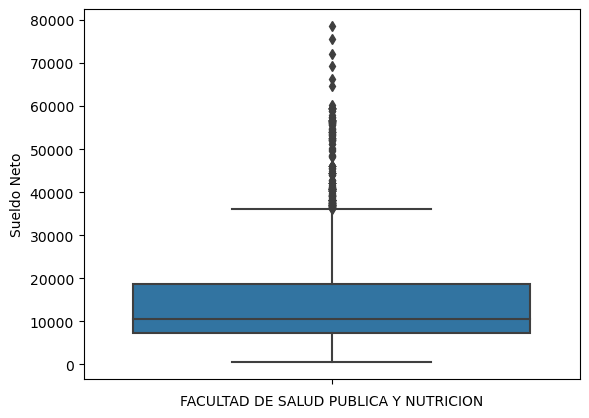

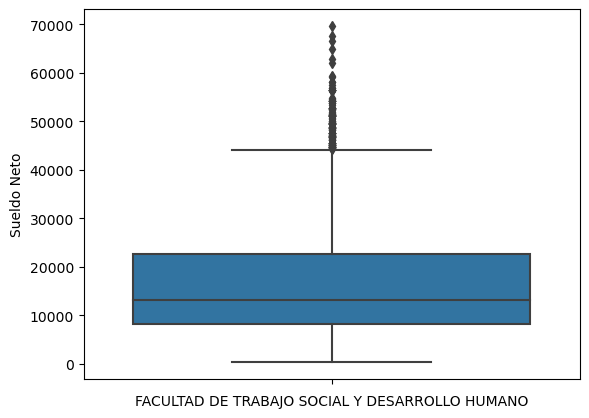

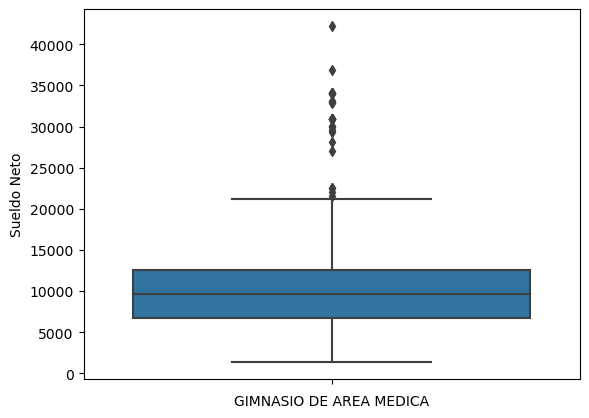

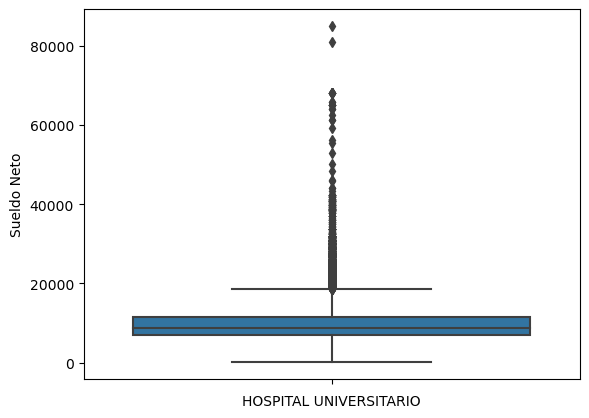

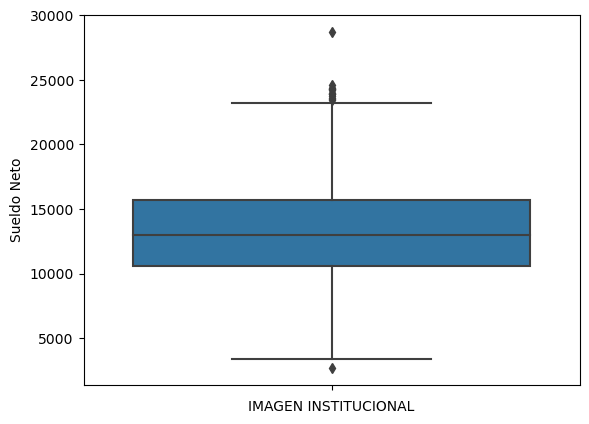

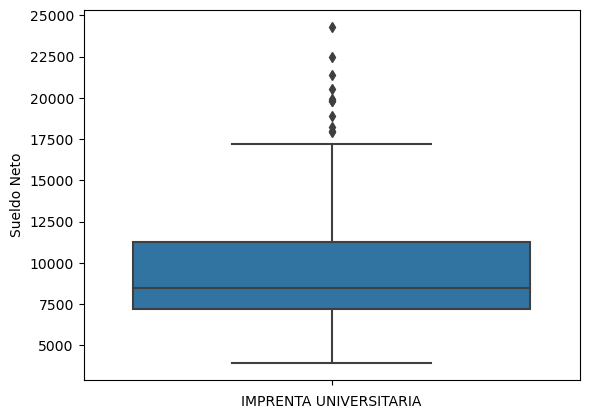

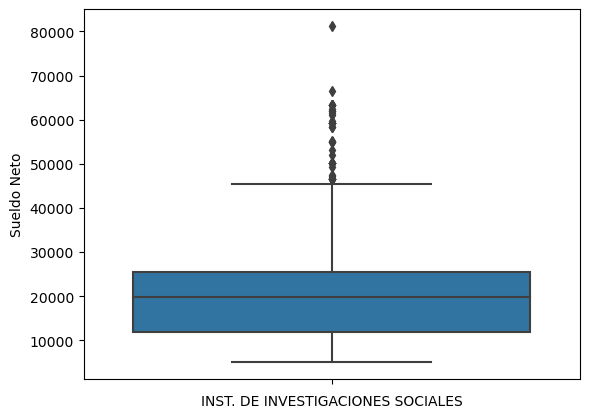

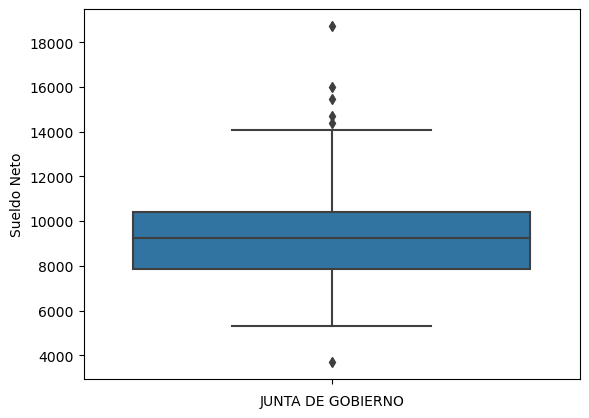

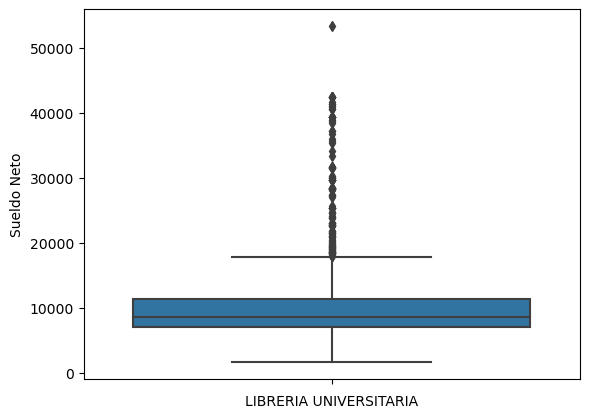

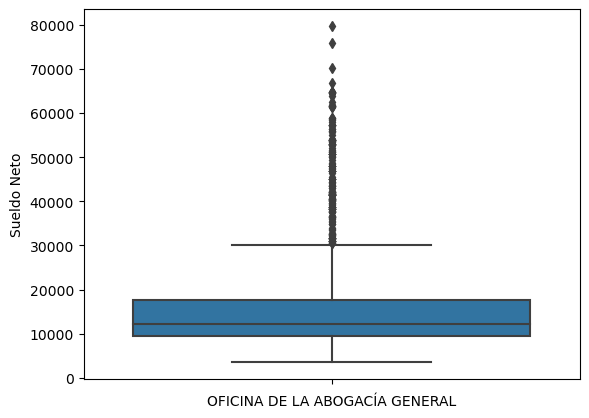

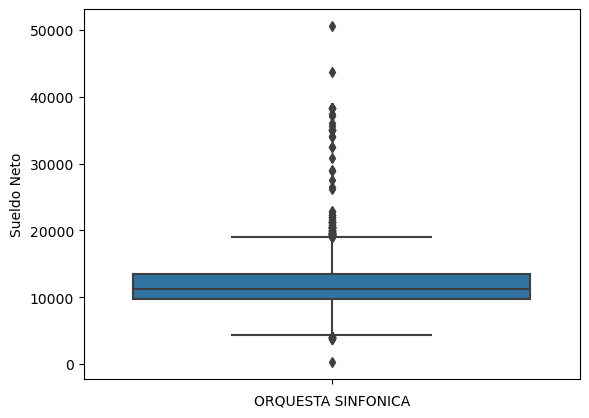

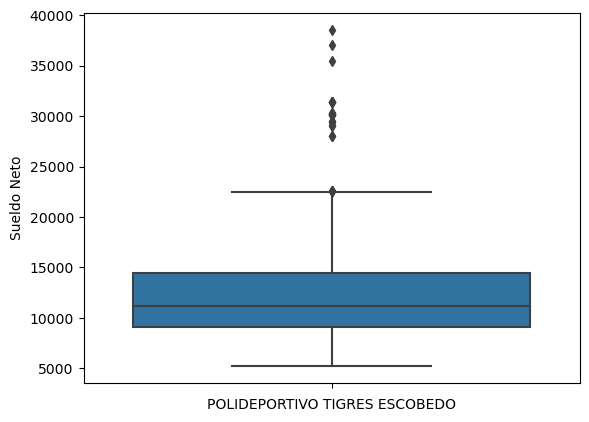

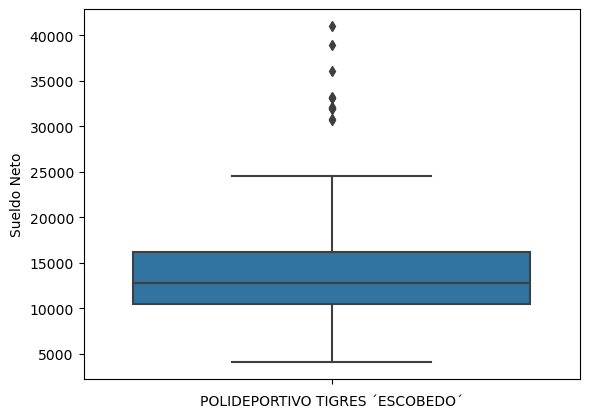

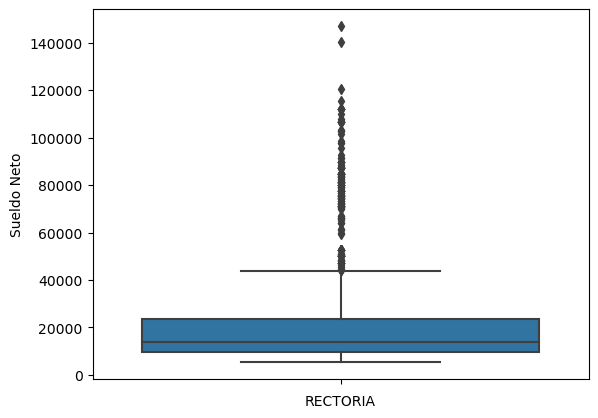

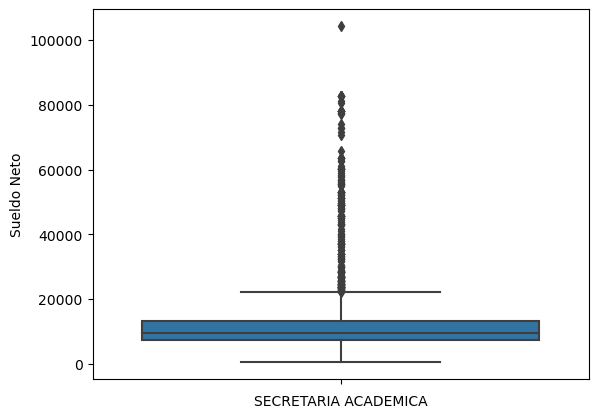

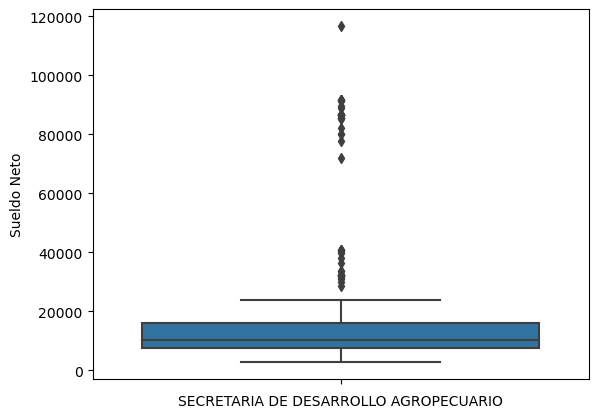

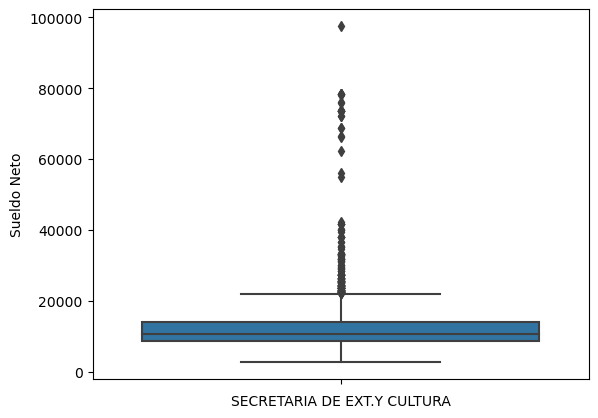

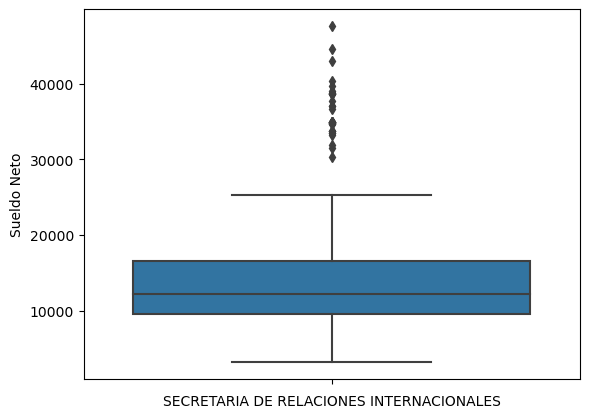

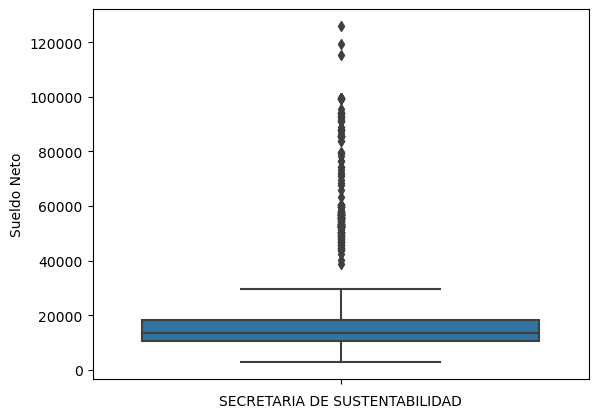

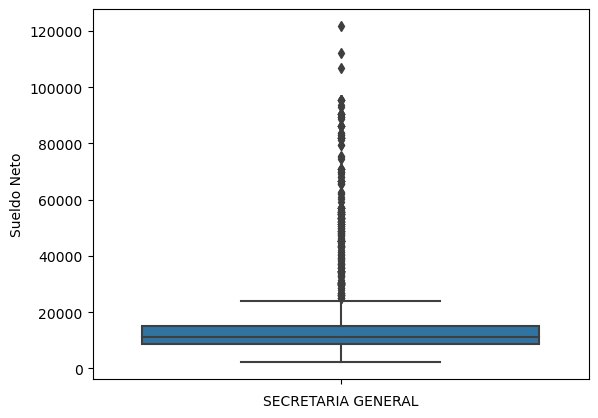

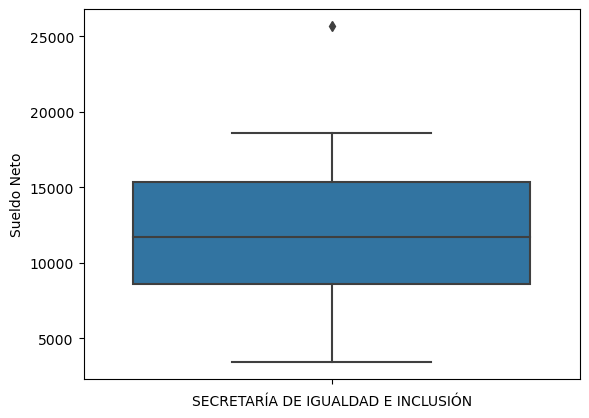

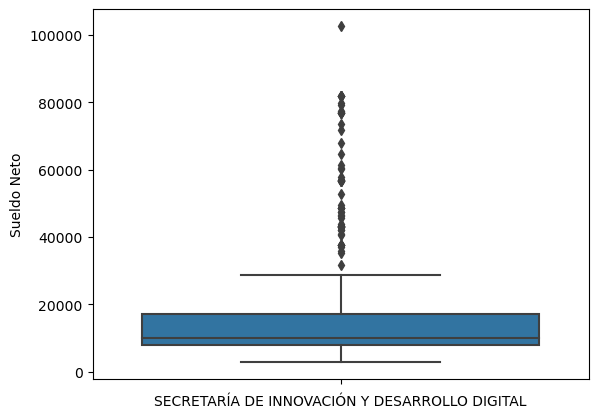

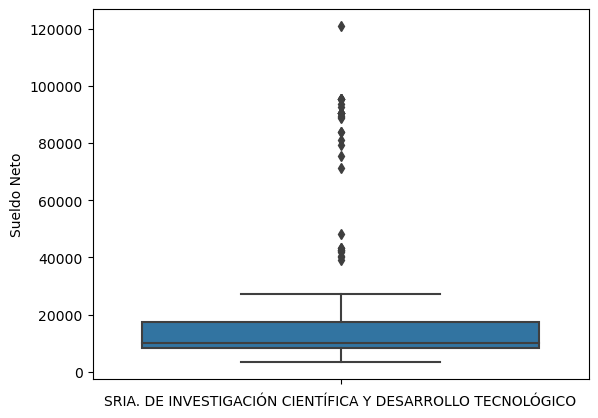

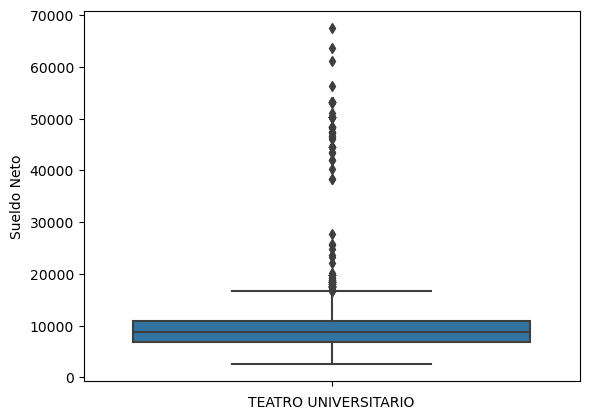

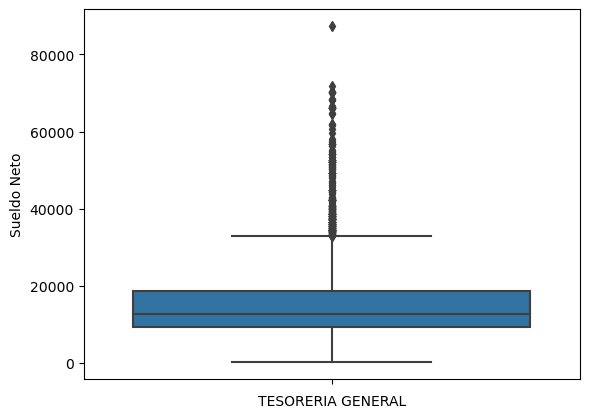

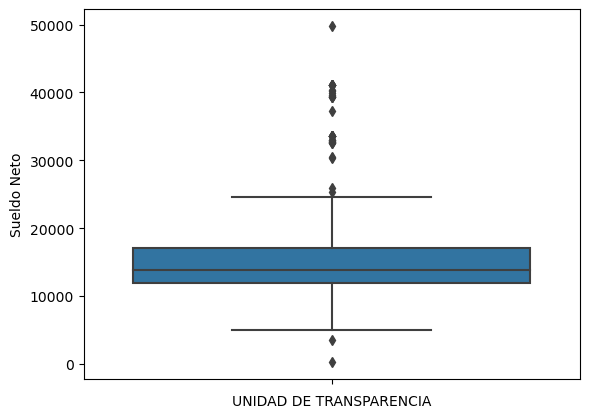

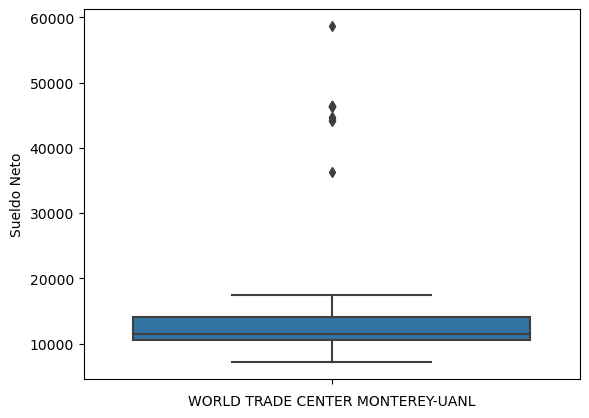

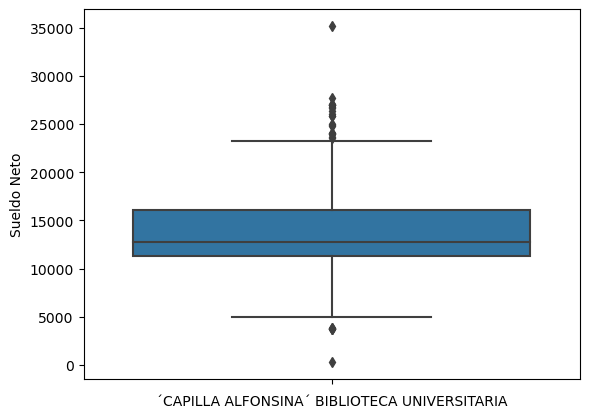

In [18]:
# Se hace un ciclo para generar imagenes a partir de la segunda agrupación de sueldos_Dependencia
for Tip in list(Sueldos_Dependencia['dependencia']):
    df_temp = Datos.loc[Datos['dependencia'] == Tip]
    plt.figure()
    sns.boxplot(y = df_temp["Sueldo Neto"])
    plt.xlabel(Tip)
    plt.show
    plt.savefig('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Aprendizaje automatico/Tareas/Tarea 1/Sueldo por dependencia/Boxplot Sueldos '+Tip+'.png', bbox_inches = 'tight')

C:\Users\alvar\AppData\Local\Temp\ipykernel_28404\2671116040.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


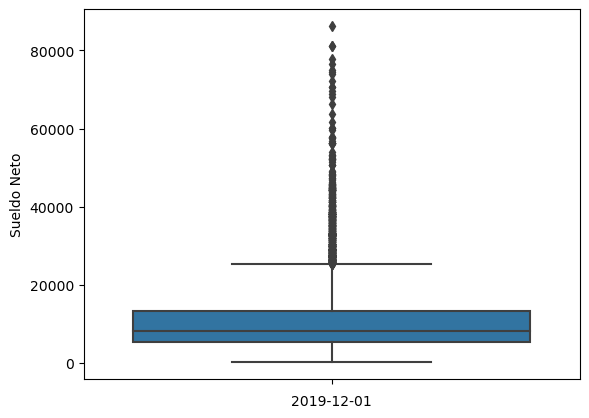

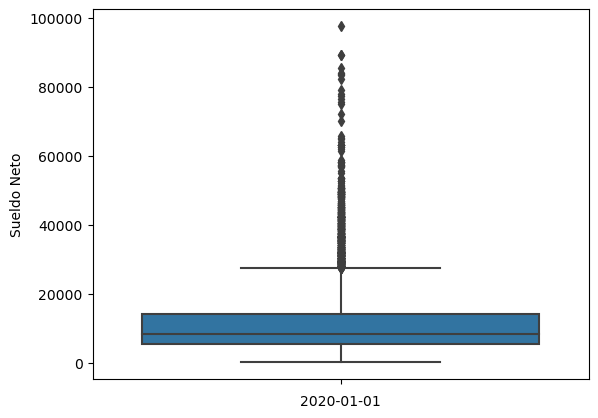

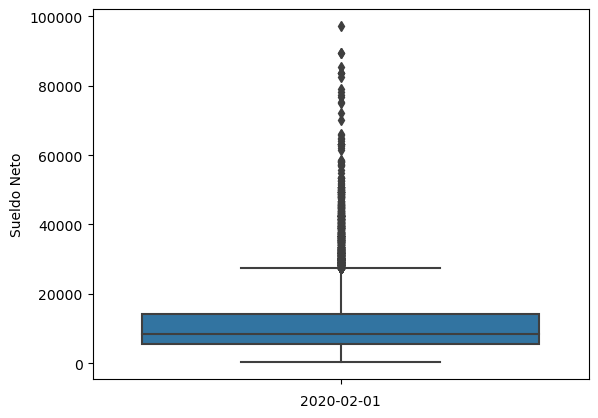

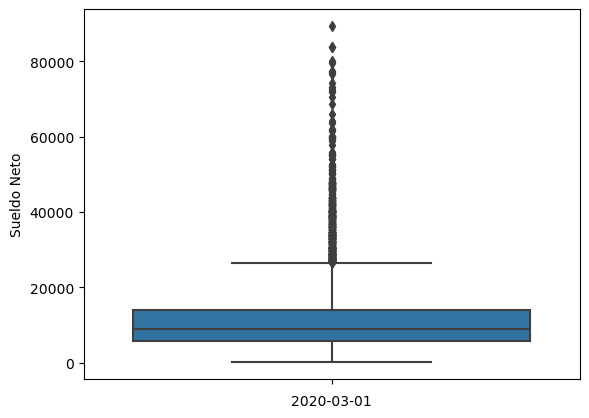

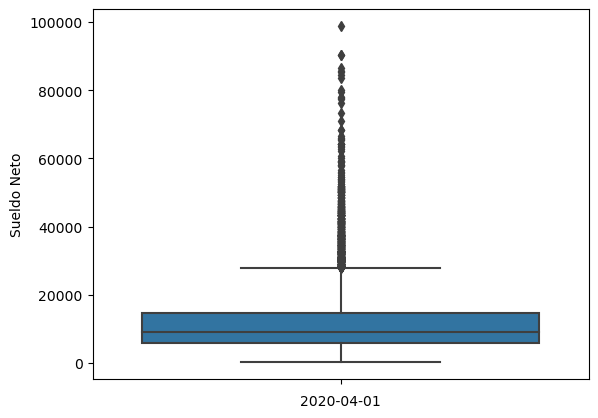

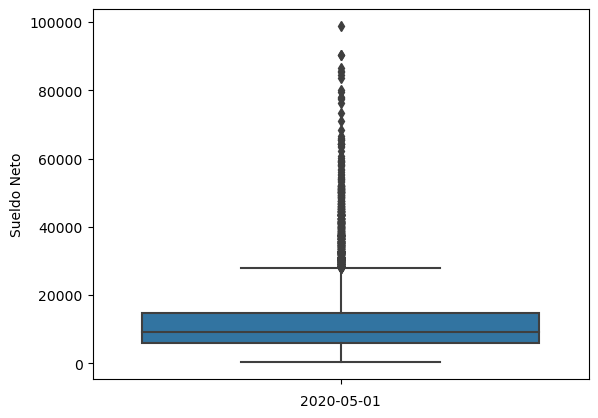

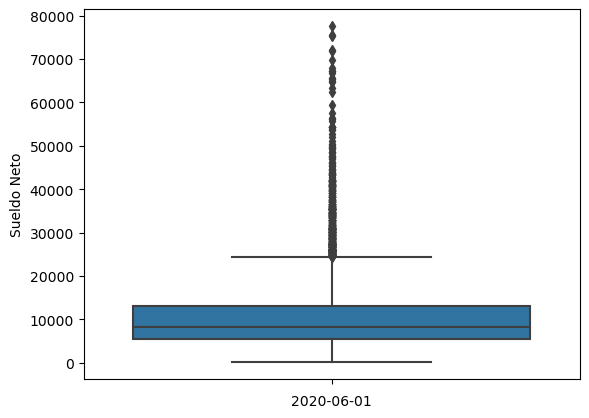

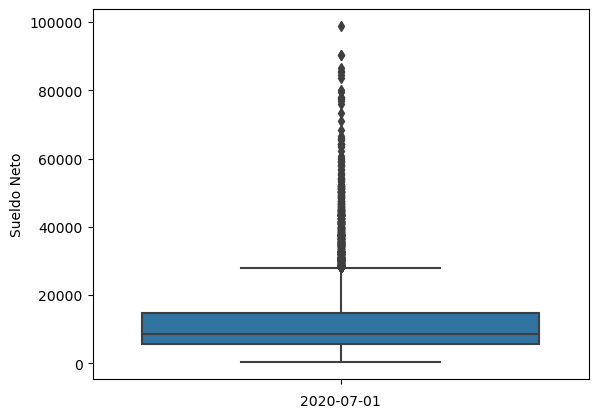

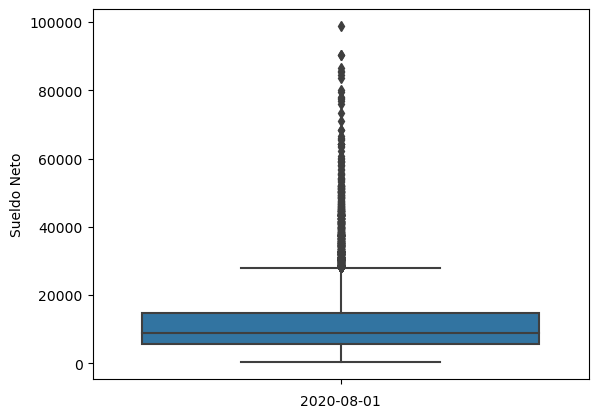

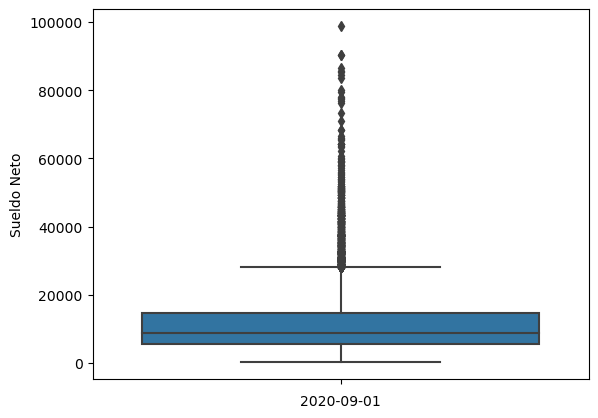

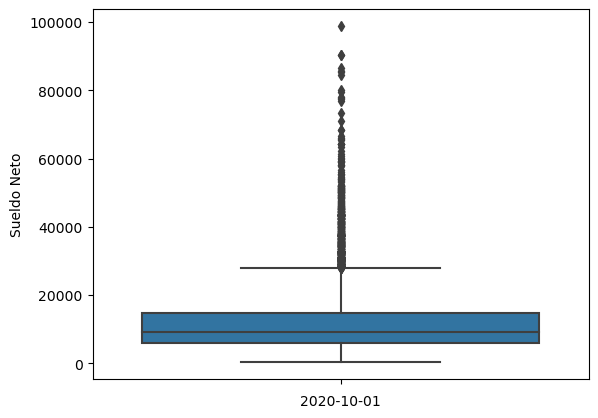

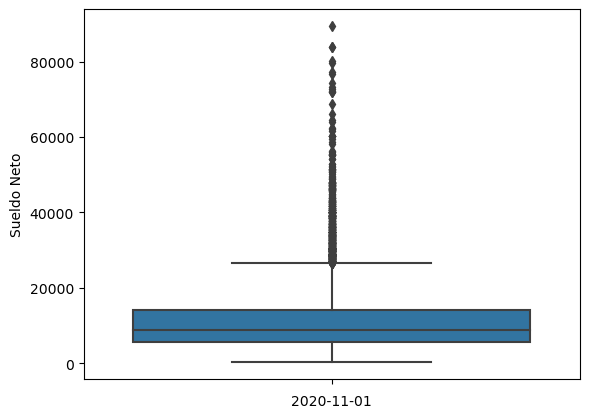

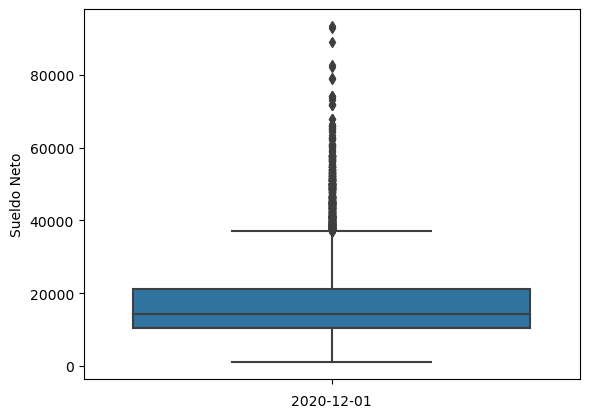

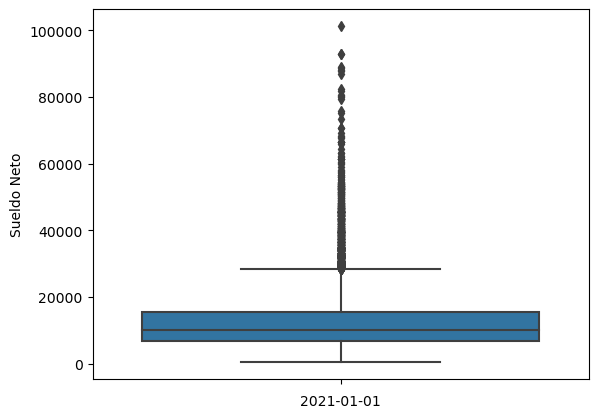

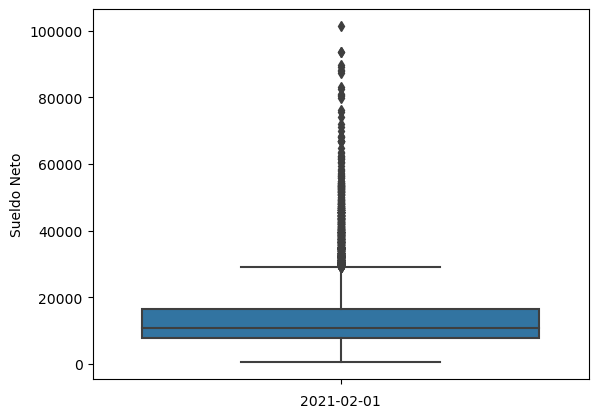

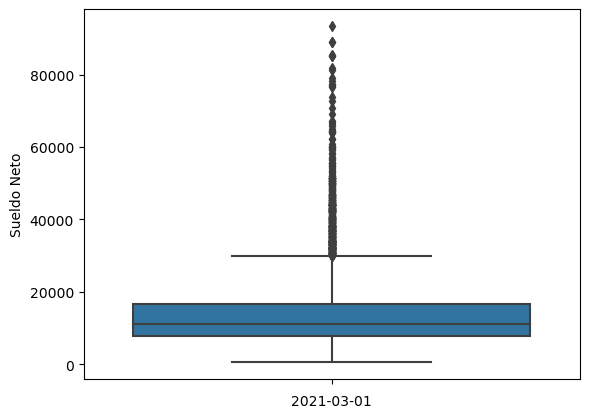

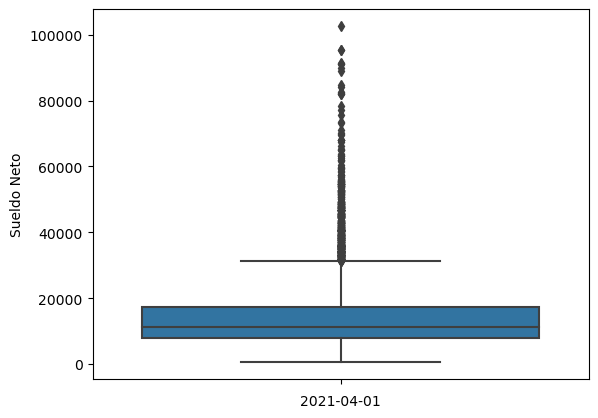

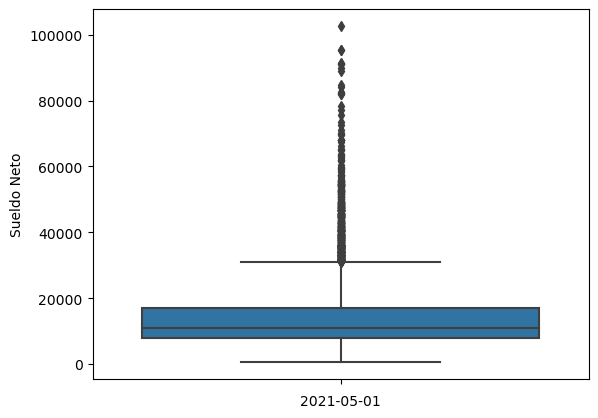

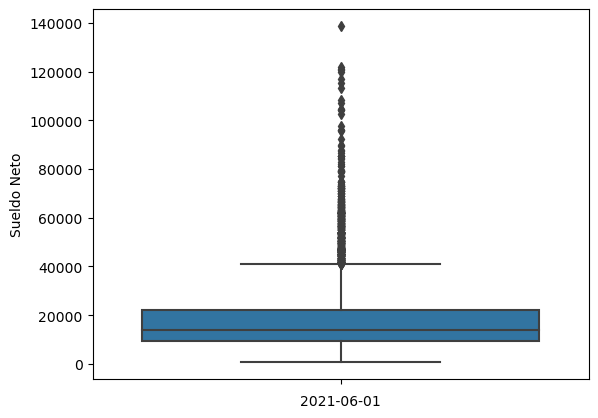

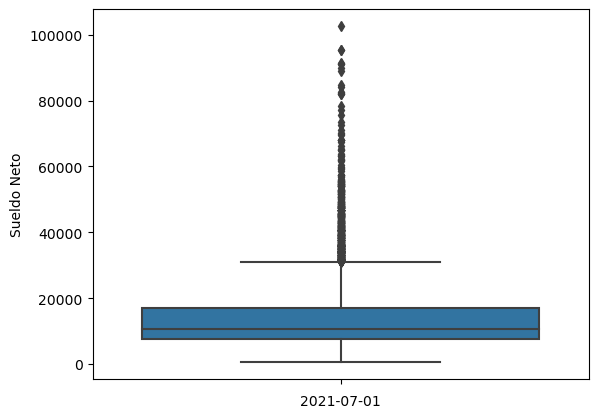

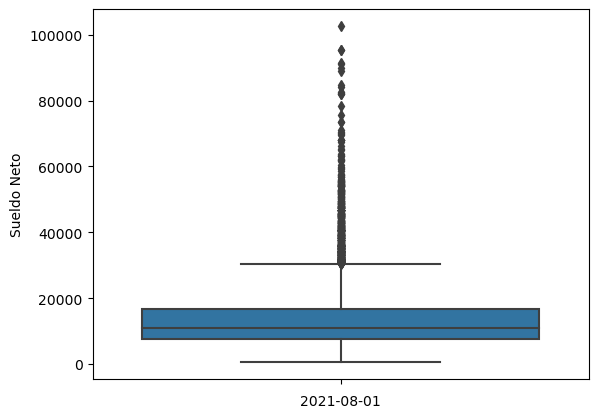

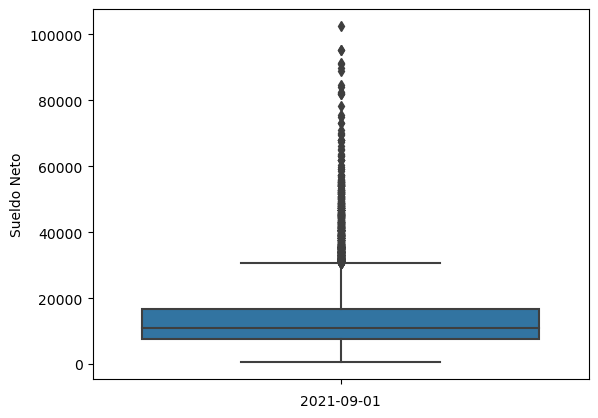

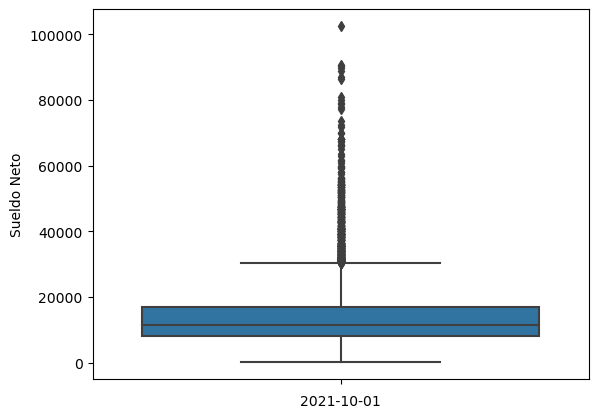

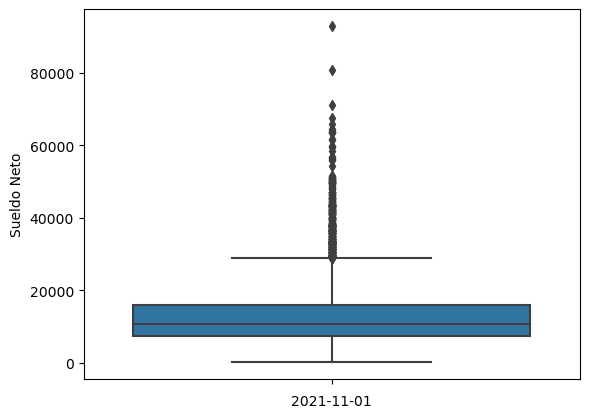

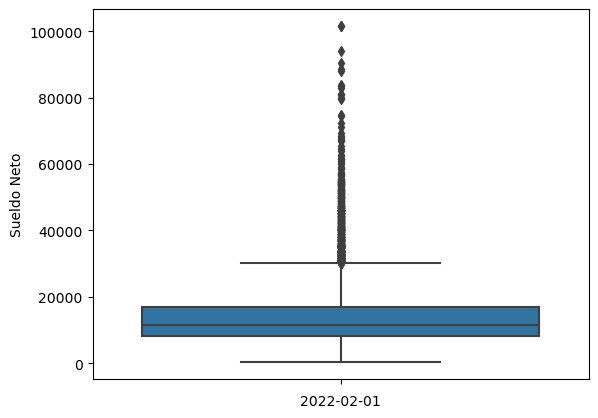

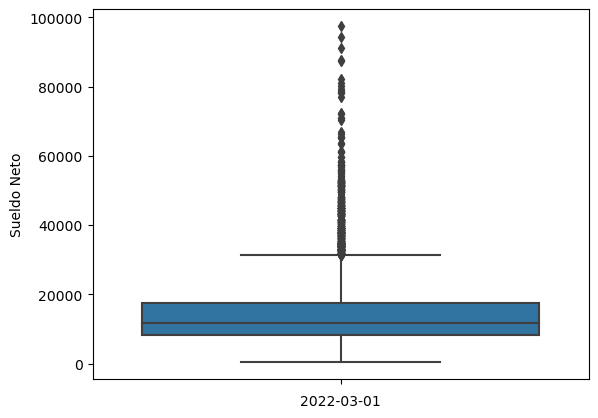

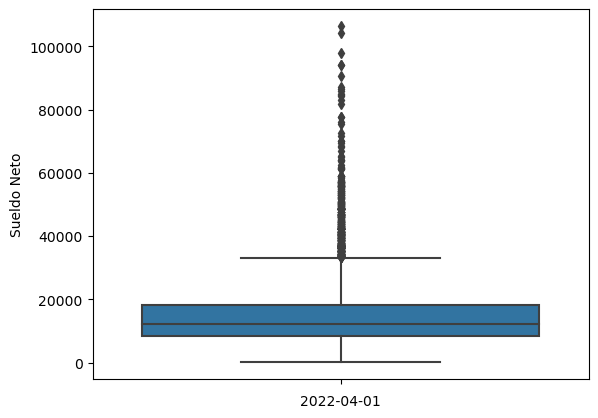

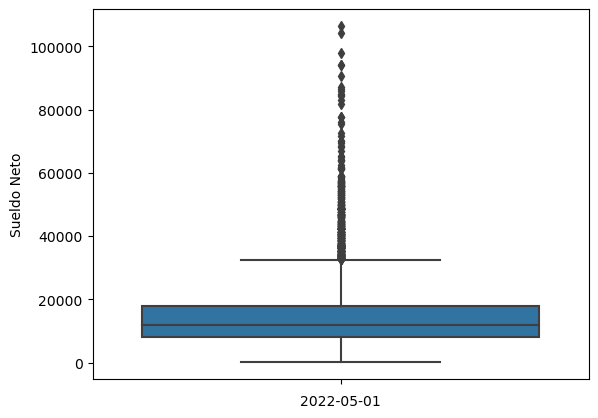

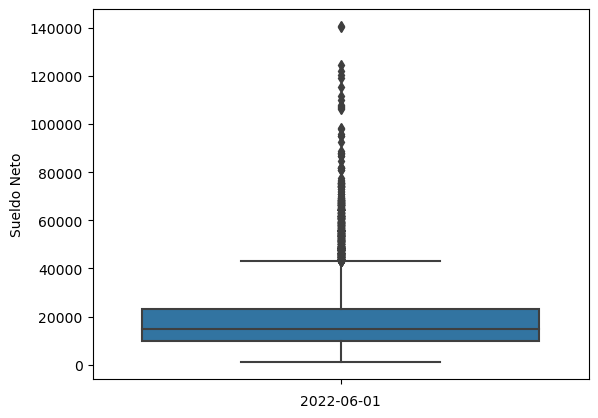

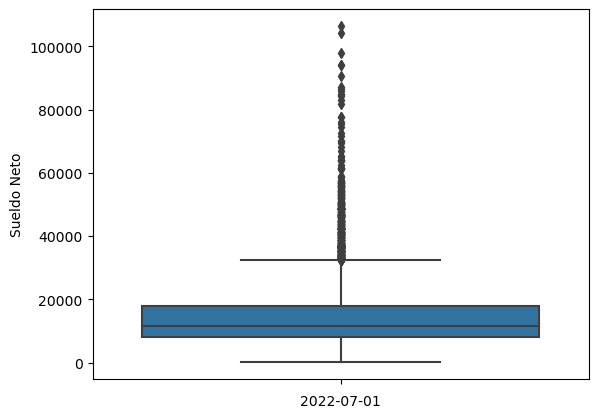

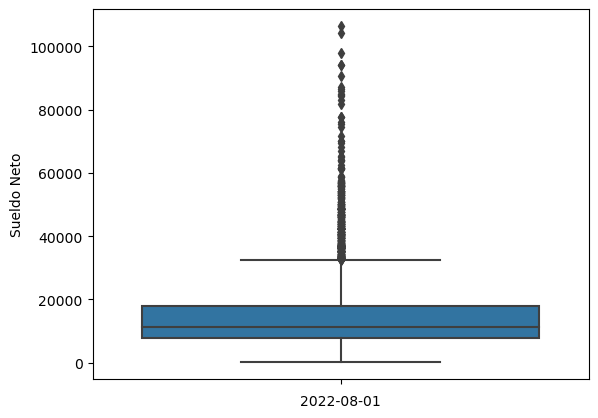

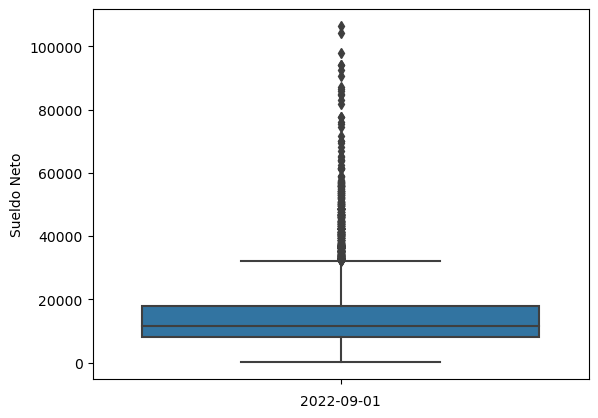

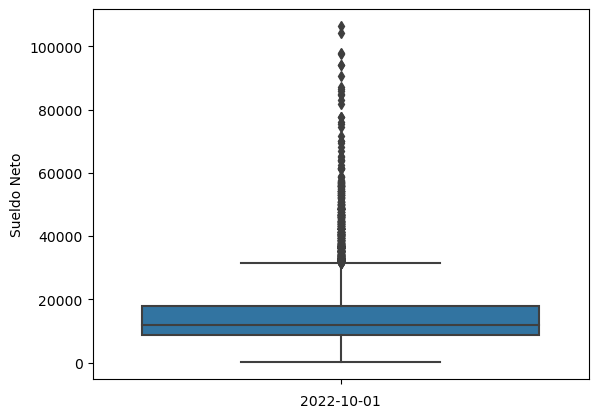

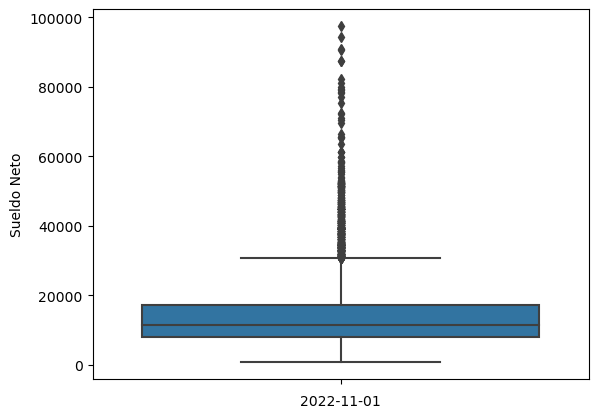

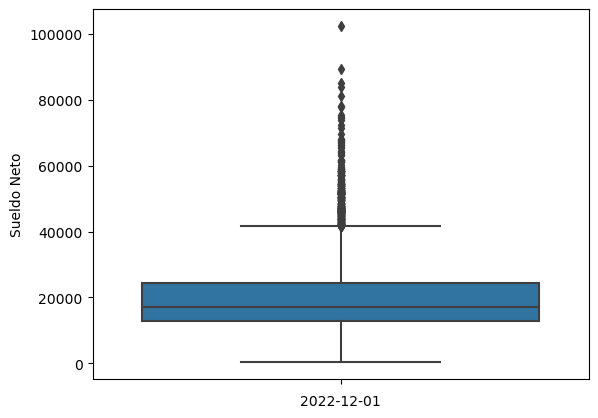

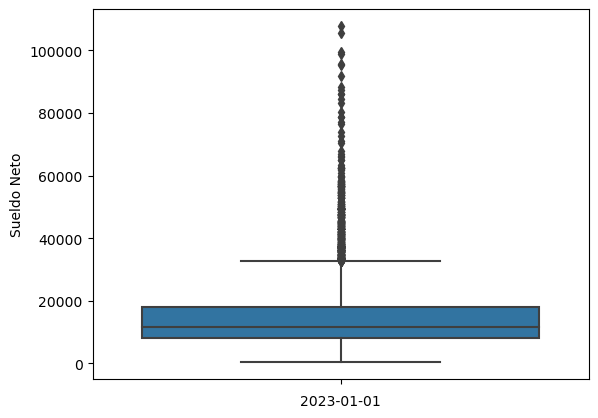

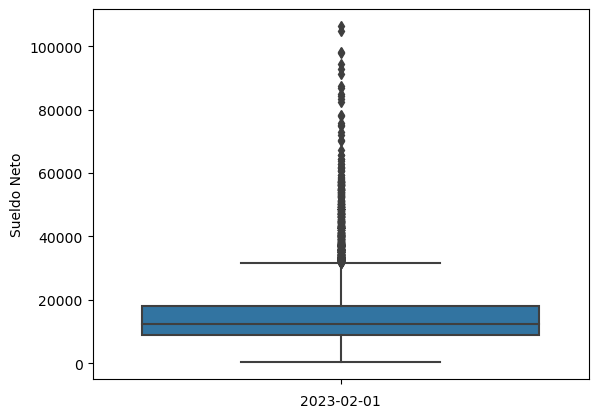

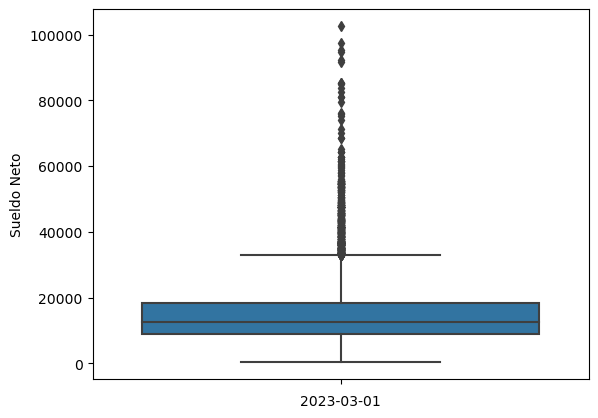

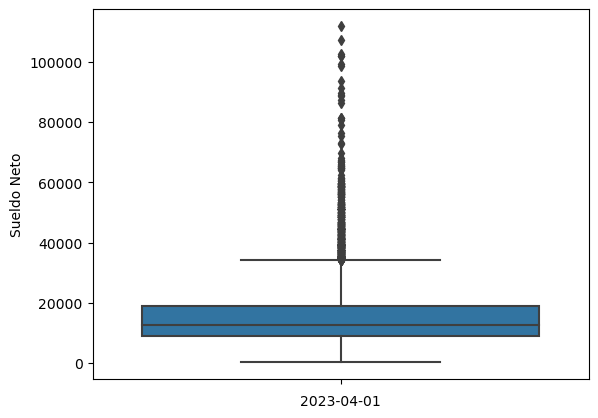

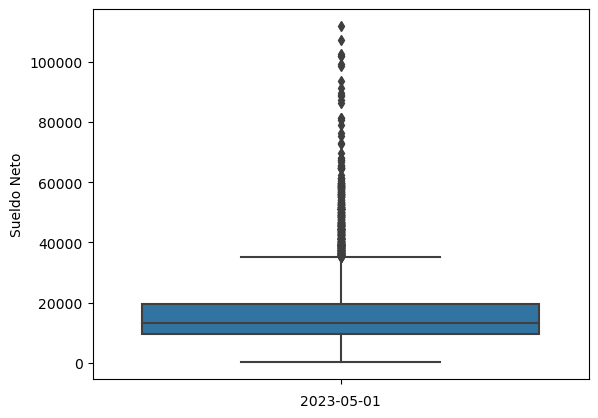

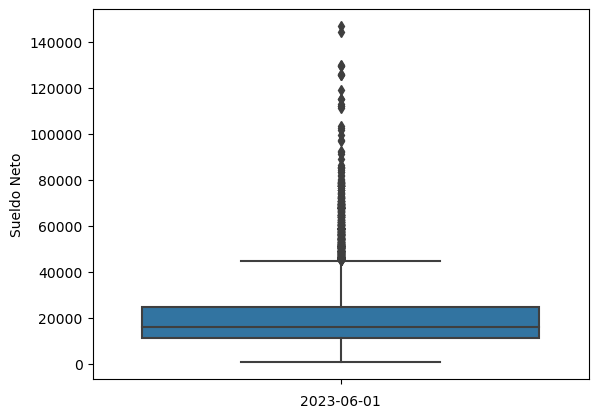

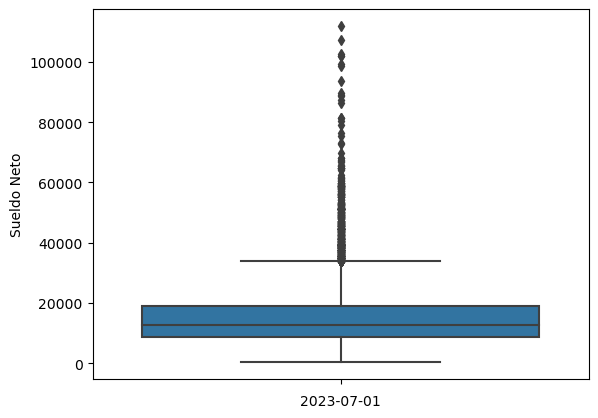

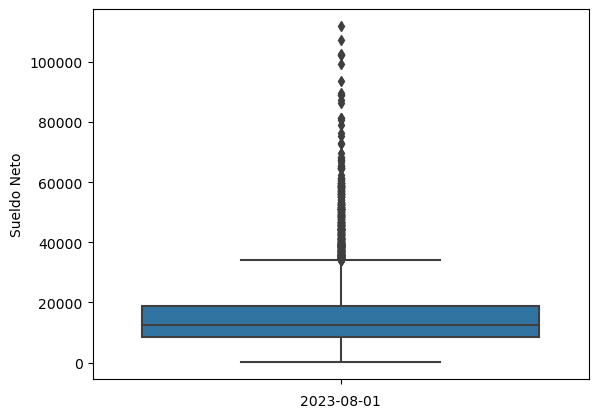

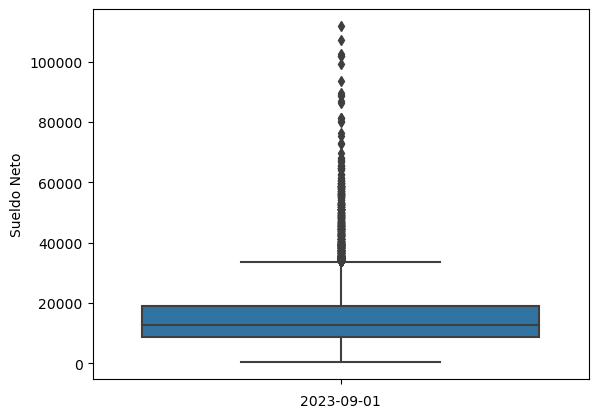

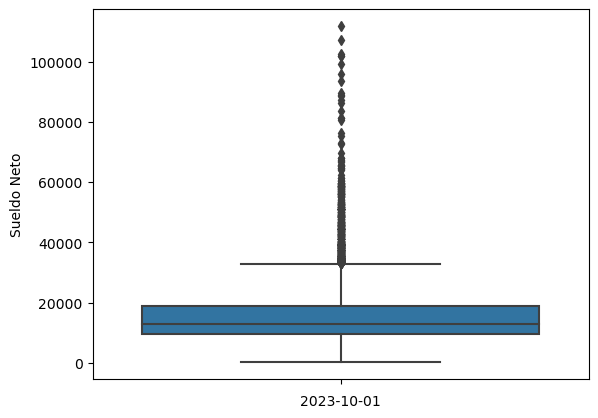

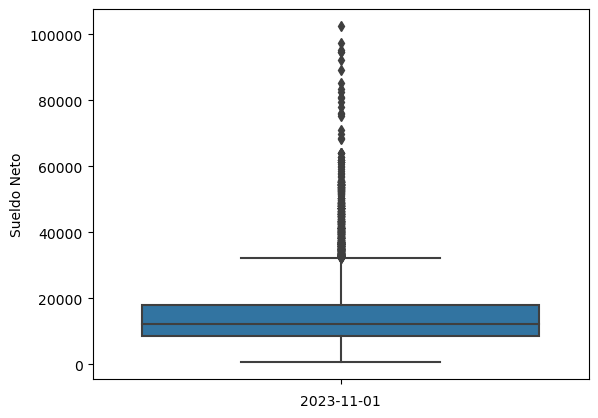

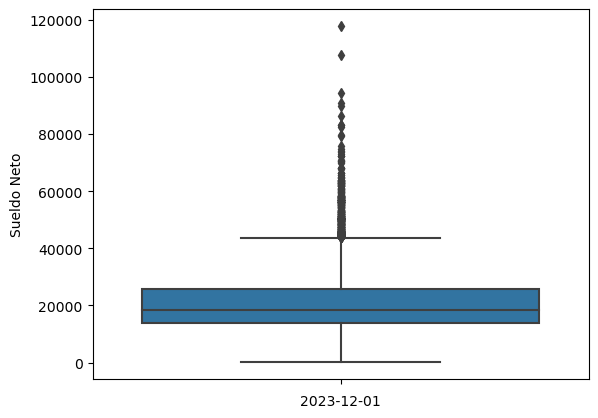

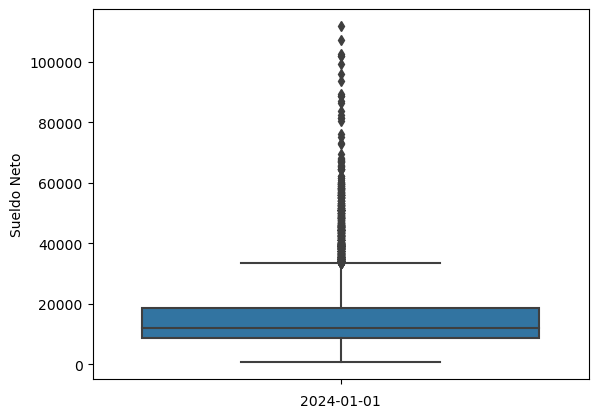

In [19]:
# Se hace un ciclo para generar imagenes a partir de la tercera agrupación de sueldos_Fecha
for Tip in list(Sueldos_Fecha['Fecha']):
    df_temp = Datos.loc[Datos['Fecha'] == Tip]
    plt.figure()
    sns.boxplot(y = df_temp["Sueldo Neto"])
    Tip2 = str(Tip)[:10]
    plt.xlabel(Tip2)
    plt.show
    Tip2 = str(Tip)[:10]
    plt.savefig('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Aprendizaje automatico/Tareas/Tarea 1/Sueldo por fecha/Boxplot Sueldos '+Tip2+'.png', bbox_inches = 'tight')

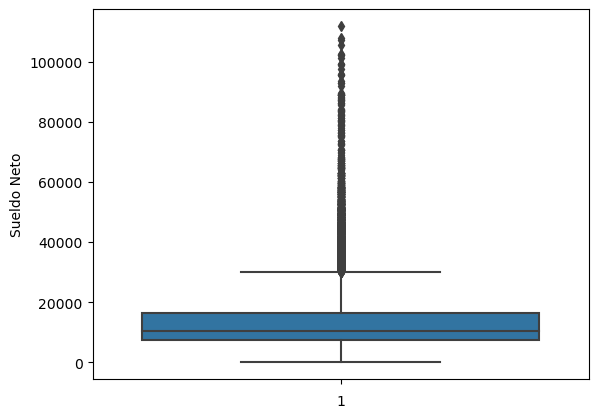

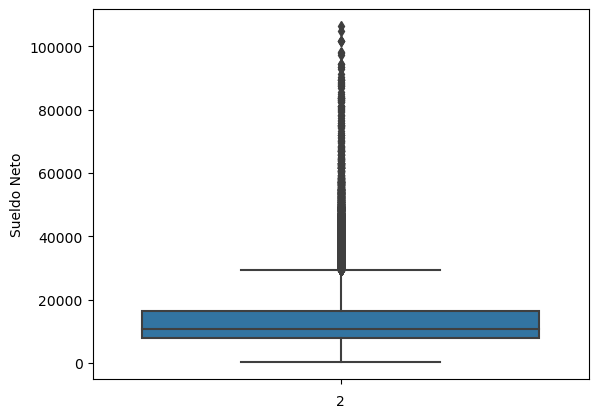

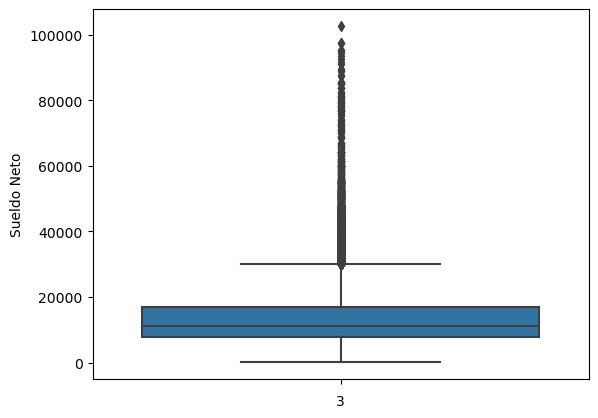

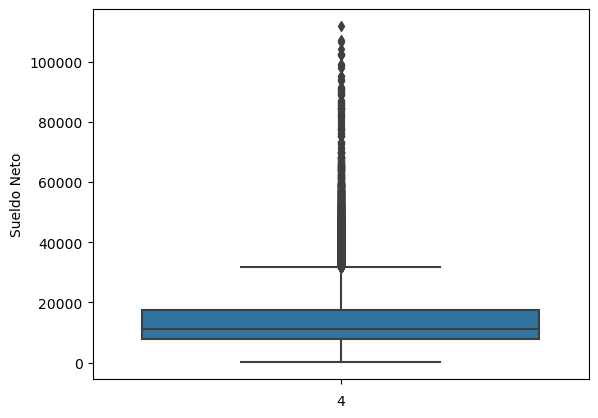

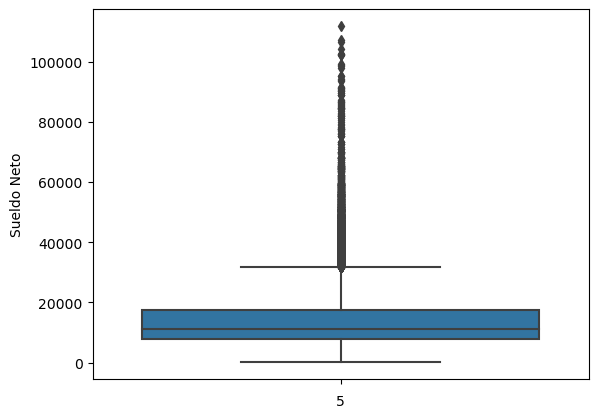

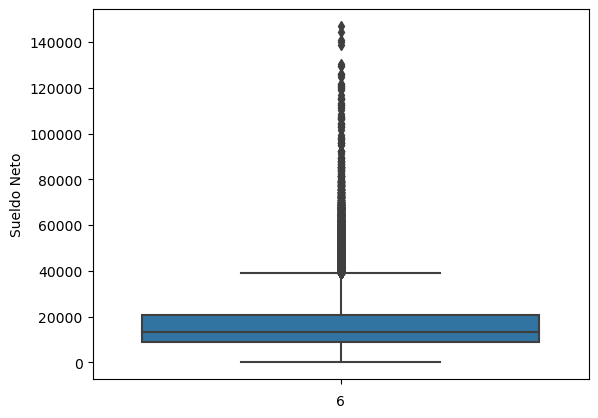

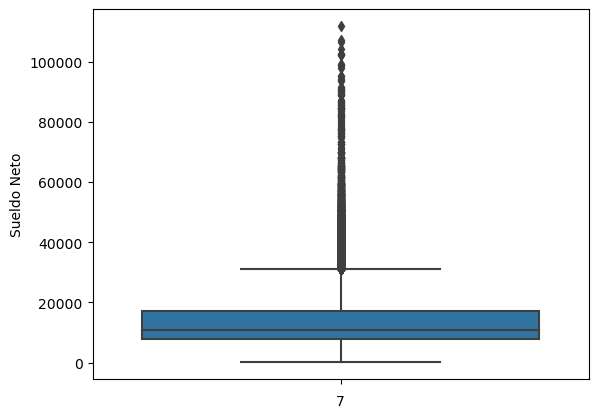

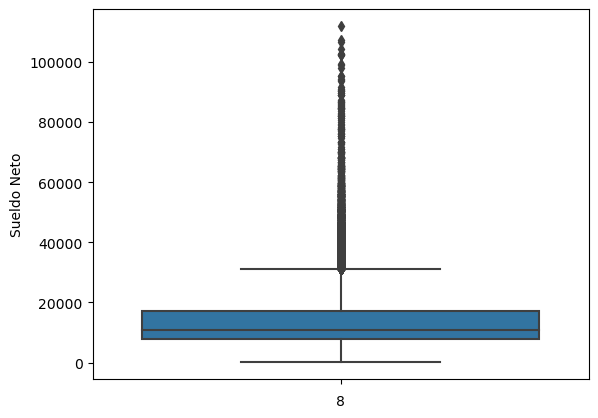

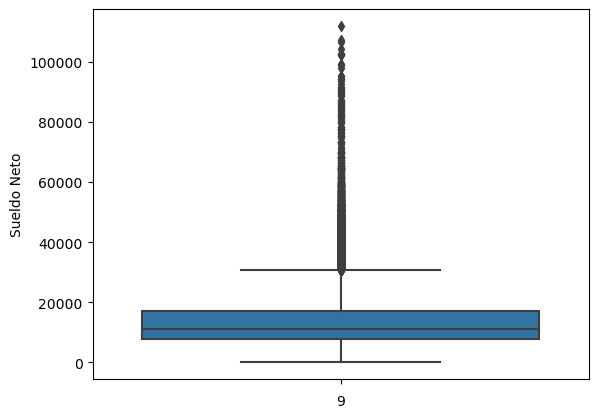

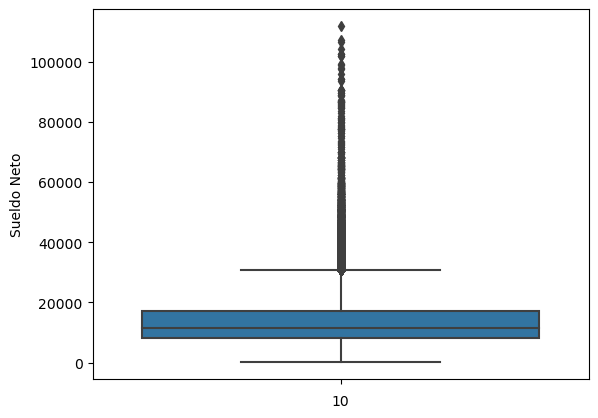

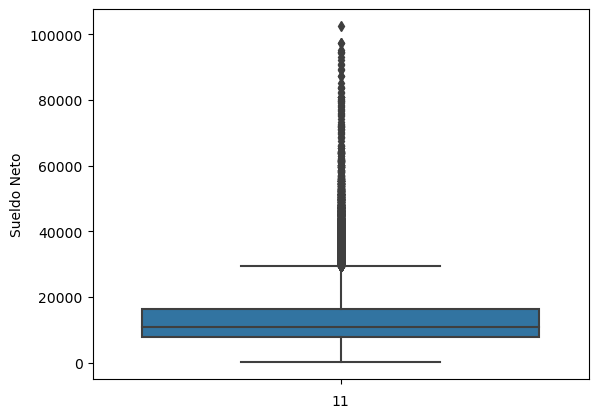

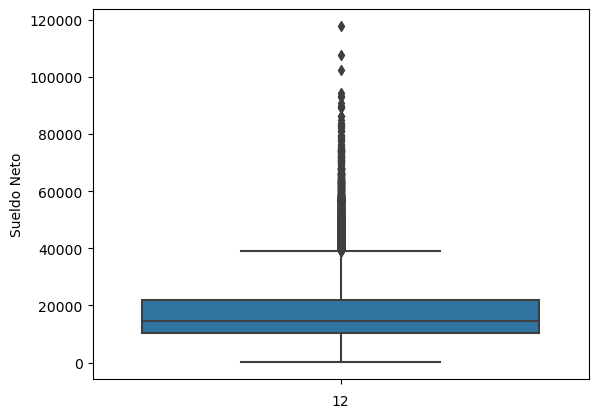

In [20]:
# Se hace un ciclo para generar imagenes a partir de la cuarta agrupación de sueldo_Mes
for Tip in list(Sueldo_Mes['Mes']):
    df_temp = Datos
    df_temp['Mes'] = df_temp['Fecha'].dt.month
    df_temp = df_temp.loc[df_temp['Mes'] == Tip]
    plt.figure()
    sns.boxplot(y = df_temp["Sueldo Neto"])
    Tip2 = str(Tip)
    plt.xlabel(Tip)
    plt.show
    plt.savefig('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Aprendizaje automatico/Tareas/Tarea 1/Sueldo por mes/Boxplot Sueldos '+Tip2+'.png', bbox_inches = 'tight')

Se realiza la prueba de normalidad a los datos:

In [21]:
pg.normality(data=Datos, dv='Sueldo Neto', group='Tipo')

c:\Users\alvar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\alvar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\alvar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\alvar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\alvar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\alvar\anaconda3\Lib\site-packages\sc

W  pval  normal
Tipo                                
ADMIN         0.612177   0.0   False
CENTRO        0.666848   0.0   False
PREPARATORIA  0.880953   0.0   False
FACULTAD      0.889463   0.0   False
HOSPITAL      0.882054   0.0   False
OTRO          0.740113   0.0   False

Como se observa en la prueba de normalidad, ninguno de los tipos de dependencia muestran evidencia de una distribución normal por lo que se procede a realizar la prueba de kruskall-wallis para evaluar si las medias son iguales entre los grupos de dependencias:

In [22]:
pg.kruskal(data=Datos, dv='Sueldo Neto', between='Tipo')

Source  ddof1             H  p-unc
Kruskal   Tipo      5  43614.846515    0.0

Como se observa el P-valor es muy pequeño o en este caso 0 por lo que si tomaramos un valor de significancia del 5% Se rechazaria la hipotesis nula por lo que al menos 2 de las variables tienen medias diferentes entre si, por lo que haremos la prueba de tukey para observar que tipo de dependencias son diferentes entre sí:

*Nota: La prueba se hará con 2 librerias para poder saber como es que se hace usando diferentes recursos, en este caso las librerias "pingouin" y statsmodels".

In [23]:
pg.pairwise_tukey(data=Datos, dv='Sueldo Neto', between='Tipo')

A             B       mean(A)       mean(B)         diff  \
0      ADMIN        CENTRO  13304.198963  12785.914565   518.284399   
1      ADMIN      FACULTAD  13304.198963  16515.567721 -3211.368757   
2      ADMIN      HOSPITAL  13304.198963   9631.383249  3672.815715   
3      ADMIN          OTRO  13304.198963  11413.737791  1890.461172   
4      ADMIN  PREPARATORIA  13304.198963  14281.078522  -976.879559   
5     CENTRO      FACULTAD  12785.914565  16515.567721 -3729.653156   
6     CENTRO      HOSPITAL  12785.914565   9631.383249  3154.531316   
7     CENTRO          OTRO  12785.914565  11413.737791  1372.176774   
8     CENTRO  PREPARATORIA  12785.914565  14281.078522 -1495.163958   
9   FACULTAD      HOSPITAL  16515.567721   9631.383249  6884.184472   
10  FACULTAD          OTRO  16515.567721  11413.737791  5101.829930   
11  FACULTAD  PREPARATORIA  16515.567721  14281.078522  2234.489199   
12  HOSPITAL          OTRO   9631.383249  11413.737791 -1782.354542   
13  HOSPITAL  PREPARATORIA   9631.383249  14281.078522 -4649.695273   
14      OTRO  PREPARATORIA  11413.737791  14281.078522 -2867.340731   

            se           T       p-tukey    hedges  
0    67.247777    7.707086  1.931788e-13  0.054303  
1    37.740587  -85.090588  0.000000e+00 -0.297262  
2    43.861258   83.737127  0.000000e+00  0.511387  
3    90.212594   20.955624  0.000000e+00  0.199734  
4    41.427832  -23.580272  0.000000e+00 -0.110555  
5    61.007098  -61.134741  0.000000e+00 -0.344294  
6    64.971717   48.552377  0.000000e+00  0.604916  
7   102.155892   13.432184  0.000000e+00  0.181734  
8    63.354395  -23.600004  0.000000e+00 -0.182362  
9    33.517346  205.391695  0.000000e+00  0.714565  
10   85.661629   59.557938  0.000000e+00  0.469538  
11   30.263308   73.834929  0.000000e+00  0.220013  
12   88.528937  -20.133017  0.000000e+00 -0.408538  
13   37.620816 -123.593685  0.000000e+00 -0.686856  
14   87.348886  -32.826300  0.000000e+00 -0.357461

In [24]:
print(smm.pairwise_tukeyhsd(endog=Datos['Sueldo Neto'],groups=Datos['Tipo'],alpha=0.05))





        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1     group2     meandiff  p-adj   lower      upper    reject
-------------------------------------------------------------------
   ADMIN       CENTRO  -518.2844   0.0  -709.9208   -326.648   True
   ADMIN     FACULTAD  3211.3688   0.0  3103.8192  3318.9183   True
   ADMIN     HOSPITAL -3672.8157   0.0 -3797.8074 -3547.8241   True
   ADMIN         OTRO -1890.4612   0.0 -2147.5405 -1633.3819   True
   ADMIN PREPARATORIA   976.8796   0.0   858.8224  1094.9367   True
  CENTRO     FACULTAD  3729.6532   0.0  3555.8009  3903.5054   True
  CENTRO     HOSPITAL -3154.5313   0.0 -3339.6816 -2969.3811   True
  CENTRO         OTRO -1372.1768   0.0  -1663.291 -1081.0626   True
  CENTRO PREPARATORIA   1495.164   0.0  1314.6226  1675.7053   True
FACULTAD     HOSPITAL -6884.1845   0.0  -6979.699 -6788.6699   True
FACULTAD         OTRO -5101.8299   0.0 -5345.9403 -4857.7195   True
FACULTAD PREPARATORIA -2234.4892   0.0 -2320.730

Como se puede observar en las pruebas de tukey, el Pvalor para la diferencia entre todos los grupos es de practicamente de 0 por lo que usando un nivel de significancia del 0.05 se rechaza que alguno de los pares de grupos formados tengan la misma media. 

Ahora se checaran los datos por preparatorias para determinnar si las medias de sueldos entre preparatorias es igual en todas:

In [25]:
Datos_Prepa = Datos.loc[Datos['Tipo'] == 'PREPARATORIA']
pg.normality(data=Datos_Prepa, dv='Sueldo Neto', group='dependencia')


c:\Users\alvar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\alvar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\alvar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\alvar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\alvar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\alvar\anaconda3\Lib\site-packages\sc

W          pval  \
dependencia                                                                  
ESCUELA PREPARATORIA # 1                            0.902767  0.000000e+00   
ESCUELA PREPARATORIA # 2                            0.888247  0.000000e+00   
ESCUELA PREPARATORIA # 3                            0.843517  0.000000e+00   
ESCUELA PREPARATORIA # 4                            0.857132  0.000000e+00   
ESCUELA PREPARATORIA # 5                            0.872898  2.726152e-31   
ESCUELA PREPARATORIA # 6                            0.774484  3.475220e-43   
ESCUELA PREPARATORIA # 7                            0.887136  0.000000e+00   
ESCUELA PREPARATORIA # 8                            0.922420  0.000000e+00   
ESCUELA PREPARATORIA # 9                            0.923831  0.000000e+00   
ESCUELA PREPARATORIA #10                            0.704028  1.605664e-39   
ESCUELA PREPARATORIA #11                            0.728058  7.977736e-36   
ESCUELA PREPARATORIA #12                            0.838651  1.681558e-44   
ESCUELA PREPARATORIA #13                            0.790990  2.115961e-43   
ESCUELA PREPARATORIA #14                            0.838385  3.185008e-32   
ESCUELA PREPARATORIA #15                            0.914744  0.000000e+00   
ESCUELA PREPARATORIA #16                            0.848068  0.000000e+00   
ESCUELA PREPARATORIA #17                            0.887503  9.314473e-36   
ESCUELA PREPARATORIA #18                            0.839556  3.853571e-43   
ESCUELA PREPARATORIA #19                            0.871023  1.347322e-38   
ESCUELA PREPARATORIA #20                            0.920343  3.711940e-33   
ESCUELA PREPARATORIA #21                            0.848123  6.171434e-33   
ESCUELA PREPARATORIA #22                            0.925711  0.000000e+00   
ESCUELA PREPARATORIA #23                            0.902418  2.802597e-45   
ESCUELA PREPARATORIA #24                            0.730550  1.144928e-33   
ESC.IND.Y PREPA.TEC.ALVARO OBREGON                  0.869916  0.000000e+00   
ESCUELA INDUSTRIAL Y PREPARATORIA TECNICA PABLO...  0.889534  0.000000e+00   
ESCUELA Y PREPARATORIA TECNICA MEDICA               0.849581  0.000000e+00   
ESCUELA PREPARATORIA #25                            0.886108  0.000000e+00   

                                                    normal  
dependencia                                                 
ESCUELA PREPARATORIA # 1                             False  
ESCUELA PREPARATORIA # 2                             False  
ESCUELA PREPARATORIA # 3                             False  
ESCUELA PREPARATORIA # 4                             False  
ESCUELA PREPARATORIA # 5                             False  
ESCUELA PREPARATORIA # 6                             False  
ESCUELA PREPARATORIA # 7                             False  
ESCUELA PREPARATORIA # 8                             False  
ESCUELA PREPARATORIA # 9                             False  
ESCUELA PREPARATORIA #10                             False  
ESCUELA PREPARATORIA #11                             False  
ESCUELA PREPARATORIA #12                             False  
ESCUELA PREPARATORIA #13                             False  
ESCUELA PREPARATORIA #14                             False  
ESCUELA PREPARATORIA #15                             False  
ESCUELA PREPARATORIA #16                             False  
ESCUELA PREPARATORIA #17                             False  
ESCUELA PREPARATORIA #18                             False  
ESCUELA PREPARATORIA #19                             False  
ESCUELA PREPARATORIA #20                             False  
ESCUELA PREPARATORIA #21                             False  
ESCUELA PREPARATORIA #22                             False  
ESCUELA PREPARATORIA #23                             False  
ESCUELA PREPARATORIA #24                             False  
ESC.IND.Y PREPA.TEC.ALVARO OBREGON                   False  
ESCUELA INDUSTRIAL Y PREPARATORIA TECNICA PABLO...   False  
ESCUELA Y 

Tomando en cuenta un valor de significancia de 0.05 podemos ver que ninguna de las preparatorias tiene una distribucion normal ya que sus p-valores son 0 o muy cercanos a 0 por lo que se hará la prueba de kruskall-wallis:

In [26]:
pg.kruskal(data=Datos_Prepa, dv='Sueldo Neto', between='dependencia')

Source  ddof1           H  p-unc
Kruskal  dependencia     27  4573.64698    0.0

Debido a que el P-valor es 0 se rechaza la hipotesis de que las medias son iguales por lo que al menos una preparatoria tiene una media distinta. Se realizaráa la prueba de tukey para determinar que pares tienen medias iguales y cuales no:

In [27]:
Pares_Prepa = smm.pairwise_tukeyhsd(endog=Datos_Prepa['Sueldo Neto'],groups=Datos_Prepa['dependencia'],alpha=0.05)
print(Pares_Prepa)

                                                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                    
                        group1                                                group2                         meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------------------------------------------------------------------------------------------
                   ESC.IND.Y PREPA.TEC.ALVARO OBREGON ESCUELA INDUSTRIAL Y PREPARATORIA TECNICA PABLO LIVAS   -29.1459    1.0  -410.0801   351.7884  False
                   ESC.IND.Y PREPA.TEC.ALVARO OBREGON                              ESCUELA PREPARATORIA # 1   782.1001    0.0   396.4495  1167.7507   True
                   ESC.IND.Y PREPA.TEC.ALVARO OBREGON                              ESCUELA PREPARATORIA # 2  1479.1103    0.0  1074.1389  1884.0816   True
                   ESC.IND.Y PREPA.TEC.ALVARO OBREGON                 

En la tabla de la prueba de tukey podemos ver que si hay algunos pares en los cuales las medias son iguales así como hay otros en los que las medias son diferentes, a continuació se jugará un poco con los datos para obetener diversas visualizaciones:

<function matplotlib.pyplot.show(close=None, block=None)>

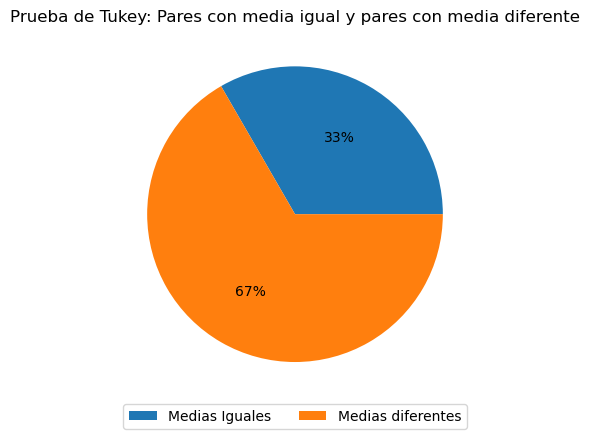

In [28]:
#Se convierte la tabla de la prueba en un dataframe
Pares_Prepa_df = pd.DataFrame(data=Pares_Prepa._results_table.data[1:], columns=Pares_Prepa._results_table.data[0])

Pares_Prepa_Conteos = Pares_Prepa_df.groupby('reject')['reject'].count().reset_index(name="count")

plt.pie(list(Pares_Prepa_Conteos['count']), autopct='%.0f%%')
plt.legend(list(['Medias Iguales', 'Medias diferentes']), loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.title("Prueba de Tukey: Pares con media igual y pares con media diferente")
plt.show
#A = Pares_Prepa_df.loc[Pares_Prepa_df['reject'] == False]
#print(A)

<function matplotlib.pyplot.show(close=None, block=None)>

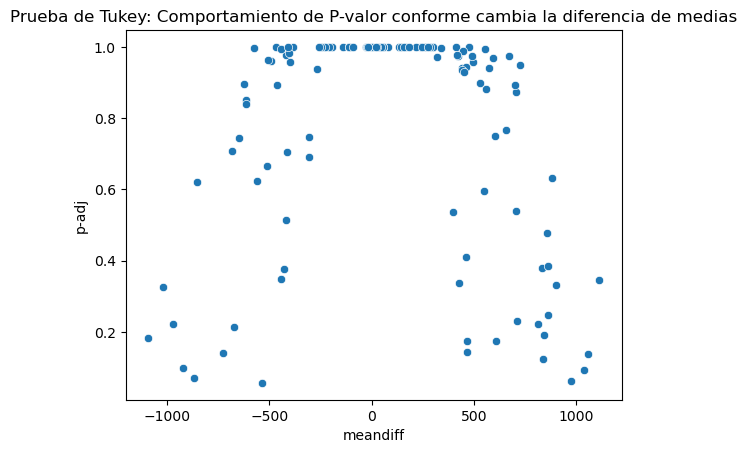

In [29]:
#Grafica para observar el comportamiento del p-valor de acuerdo a la diferencia de medias en aquellos pares que muestran medias iguales:
Pares_Prepa_Medias_iguales = Pares_Prepa_df.loc[Pares_Prepa_df['reject'] == False]
sns.scatterplot(data=Pares_Prepa_Medias_iguales, x="meandiff", y="p-adj")
plt.title("Prueba de Tukey: Comportamiento de P-valor conforme cambia la diferencia de medias")
plt.show

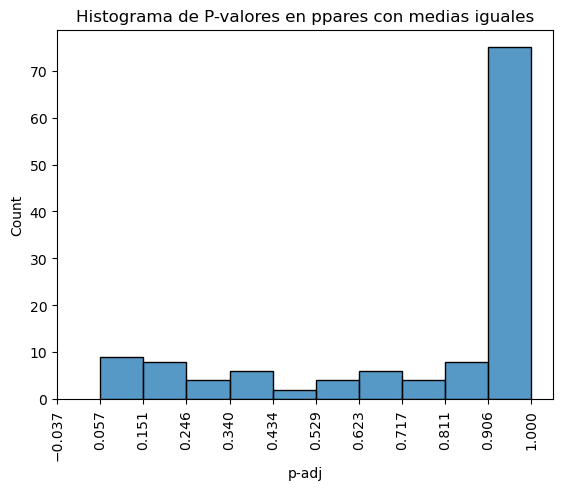

In [30]:
#Grafica para observar la distribucion del P-valor de los pares de preparatorias que son iguales 
min_val = Pares_Prepa_Medias_iguales['p-adj'].min()
max_val = Pares_Prepa_Medias_iguales['p-adj'].max()
val_width = max_val - min_val
n_bins = 10
bin_width = val_width/n_bins

sns.histplot(data = Pares_Prepa_Medias_iguales, x="p-adj", bins=n_bins, binrange=(min_val, max_val))
plt.xticks(np.arange(min_val-bin_width, max_val+bin_width, bin_width), rotation=90)
plt.title("Histograma de P-valores en ppares con medias iguales")
plt.show()

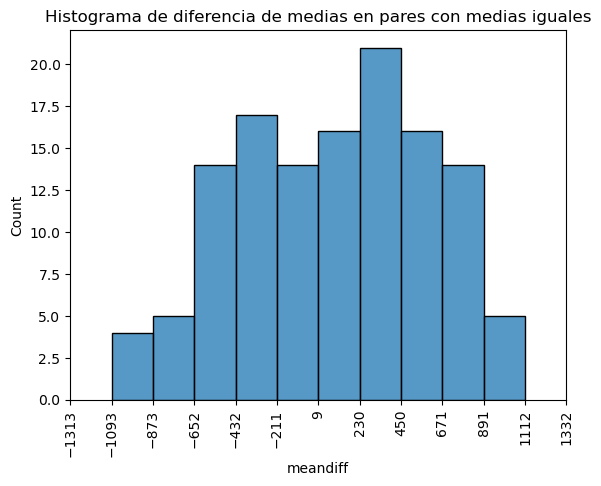

In [31]:
#Grafica para observar la distribucion de la diferencia de medias de los pares de preparatorias que son iguales 
min_val2 = Pares_Prepa_Medias_iguales['meandiff'].min()
max_val2 = Pares_Prepa_Medias_iguales['meandiff'].max()
val_width2 = max_val2 - min_val2
n_bins2 = 10
bin_width2 = val_width2/n_bins2

sns.histplot(data = Pares_Prepa_Medias_iguales, x="meandiff", bins=n_bins2, binrange=(min_val2, max_val2))
plt.xticks(np.arange(min_val2-bin_width2, max_val2+bin_width2, bin_width2), rotation=90)
plt.title("Histograma de diferencia de medias en pares con medias iguales")
plt.show()